# 1.1

**1.1.2**

In [ ]:
!gdown 1Bn9G0-zpMl-YQAlzA_XIxWwc77lRpcaB
#pima = pd.read_excel('/content/ECU + Tunnel_1.xlsx',header=None, names=col_names)


Downloading...
From: https://drive.google.com/uc?id=1Bn9G0-zpMl-YQAlzA_XIxWwc77lRpcaB
To: /content/weather_prediction_dataset.csv
100% 2.77M/2.77M [00:00<00:00, 47.3MB/s]


In [ ]:
# Import required libraries
import pandas as pd

# Define the file path
dataset_path = "weather_prediction_dataset.csv"

# Load the dataset
df = pd.read_csv(dataset_path)

# Display dataset columns
print("Dataset columns:", df.columns)

# List of French cities based on column names
french_cities = ["TOURS", "PARIS", "LYON", "MARSEILLE", "NICE"]

# Select columns related to French cities
selected_columns = ["DATE", "MONTH"]  # Keep time-related information
for city in french_cities:
    selected_columns += [col for col in df.columns if city in col]

# Create a new dataframe with only French cities' data
df_france = df[selected_columns]

# Save the filtered dataset to a new CSV file
filtered_dataset_path = "weather_prediction_france.csv"
df_france.to_csv(filtered_dataset_path, index=False)

# Display the first few rows of the new dataset
print(df_france.head())

# Display general information about the filtered dataset
print(df_france.info())

print(f"Filtered dataset for French cities has been successfully saved at: {filtered_dataset_path}")


Dataset columns: Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)
       DATE  MONTH  TOURS_wind_speed  TOURS_humidity  TOURS_pressure  \
0  20000101      1               1.6            0.97          1.0275   
1  20000102      1               2.0            0.99          1.0293   
2  20000103      1               3.4            0.91          1.0267   
3  20000104      1               4.9            0.95          1.0222   
4  20000105      1               3.6            0.95          1.0209   

   TOURS_global_radiation  TOURS_precipitation  TOURS_temp_mean  \
0     

**1.1.3**

In [ ]:
# بررسی تعداد نمونه‌ها در داده‌ها
num_samples = df.shape[0]
print(f'تعداد نمونه‌ها در مجموعه داده: {num_samples}')


تعداد نمونه‌ها در مجموعه داده: 3654


In [ ]:
# تبدیل ستون تاریخ به فرمت تاریخ
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

# استخراج اولین و آخرین تاریخ
start_date = df['DATE'].min()
end_date = df['DATE'].max()

print(f'بازه زمانی داده‌ها: از {start_date} تا {end_date}')


بازه زمانی داده‌ها: از 2000-01-01 00:00:00 تا 2010-01-01 00:00:00


In [ ]:
# Import required libraries
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
dataset_path = "weather_prediction_dataset.csv"
df = pd.read_csv(dataset_path)

# Display dataset info
print(df.info())

# Convert DATE column to datetime format
df["DATE"] = pd.to_datetime(df["DATE"], format="%Y%m%d")

# Remove rows with missing values
df_cleaned = df.dropna()

# Normalize numerical columns
scaler = MinMaxScaler()
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# Split into training and testing sets (80% train, 20% test)
train_set, test_set = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# Save the cleaned dataset
df_cleaned.to_csv("weather_prediction_cleaned.csv", index=False)
train_set.to_csv("weather_prediction_train.csv", index=False)
test_set.to_csv("weather_prediction_test.csv", index=False)

print("Data preprocessing completed successfully!")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB
None
Data preprocessing completed successfully!


**1.1.4**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# تابع برای تقسیم داده‌ها به پنجره‌ها
def create_windows(data, window_size, overlap):
    windows = []
    for i in range(len(data) - window_size - overlap):
        windows.append(data[i:i+window_size])
    return np.array(windows)

# داده‌ها را برای پنجره‌های مختلف تقسیم می‌کنیم
window_size = 5
overlap = 4
data = df['TOURS_temp_mean'].values  # مثال از ویژگی دمای شهر Tours

# ایجاد پنجره‌های زمانی
windows = create_windows(data, window_size, overlap)

# تقسیم داده‌ها به مجموعه آموزش و آزمون
train_data, test_data = train_test_split(windows, test_size=0.2, shuffle=False)

# آموزش مدل رگرسیون خطی
model = LinearRegression()
X_train = train_data[:, :-1]  # ویژگی‌ها
y_train = train_data[:, -1]   # برچسب‌ها

model.fit(X_train, y_train)

# پیش‌بینی روی داده‌های آزمون
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

y_pred = model.predict(X_test)

# ارزیابی مدل
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 4.518339394428953
Root Mean Squared Error: 2.125638585091302


In [ ]:
# Select a target feature (e.g., TOURS_temp_mean)
target_feature = "TOURS_temp_mean"

# Define a function to create sliding windows
def create_sliding_window(data, target_col, n_steps):
    """
    Creates a dataset using a sliding window approach.
    :param data: DataFrame containing the time-series data
    :param target_col: The column we want to predict
    :param n_steps: Number of previous time steps to use as input
    :return: X (inputs), y (target values)
    """
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[target_col].iloc[i-n_steps:i].values)
        y.append(data[target_col].iloc[i])
    return np.array(X), np.array(y)

# Create datasets for the two scenarios
X_single, y_single = create_sliding_window(df, target_feature, 1)  # Single step
X_multi, y_multi = create_sliding_window(df, target_feature, 5)  # Multi-step (5 previous values)

# Split into training and testing sets (80% train, 20% test)
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single, y_single, test_size=0.2, random_state=42)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Save the datasets
np.save("X_train_single.npy", X_train_single)
np.save("X_test_single.npy", X_test_single)
np.save("y_train_single.npy", y_train_single)
np.save("y_test_single.npy", y_test_single)

np.save("X_train_multi.npy", X_train_multi)
np.save("X_test_multi.npy", X_test_multi)
np.save("y_train_multi.npy", y_train_multi)
np.save("y_test_multi.npy", y_test_multi)

print("Data preprocessing for sliding window is completed successfully!")


Data preprocessing for sliding window is completed successfully!


In [ ]:
y_train_multi

array([15.9, 10.9, 17.9, ..., 14.4, 21. , 16.6])

In [ ]:
X_train_single.shape

(2922, 1)

# 1.2

In [ ]:
city_data = df[['DATE', 'TOURS_temp_mean', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_precipitation']]
city_data['DATE'] = pd.to_datetime(city_data['DATE'], format='%Y%m%d')

print(city_data.head())

        DATE  TOURS_temp_mean  TOURS_humidity  TOURS_pressure  \
0 2000-01-01              8.5            0.97          1.0275   
1 2000-01-02              7.9            0.99          1.0293   
2 2000-01-03              8.1            0.91          1.0267   
3 2000-01-04              8.6            0.95          1.0222   
4 2000-01-05              8.0            0.95          1.0209   

   TOURS_precipitation  
0                 0.04  
1                 0.16  
2                 0.00  
3                 0.44  
4                 0.04  


<ipython-input-11-a834537fcb86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['DATE'] = pd.to_datetime(city_data['DATE'], format='%Y%m%d')


#1.3

In [ ]:
df_cleaned.head

<bound method NDFrame.head of            DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0    2000-01-01    0.0              1.000        0.850000        0.778986   
1    2000-01-02    0.0              1.000        0.816667        0.836957   
2    2000-01-03    0.0              0.625        0.716667        0.829710   
3    2000-01-04    0.0              0.875        0.683333        0.735507   
4    2000-01-05    0.0              0.625        0.866667        0.706522   
...         ...    ...                ...             ...             ...   
3649 2009-12-28    1.0              0.875        0.733333        0.413043   
3650 2009-12-29    1.0              0.875        0.900000        0.311594   
3651 2009-12-30    1.0              1.000        0.900000        0.222826   
3652 2009-12-31    1.0              0.875        0.916667        0.184783   
3653 2010-01-01    0.0              1.000        0.916667        0.197464   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                   0.042857             0.003963        0.000000   
1                   0.057143             0.000000        0.000000   
2                   0.128571             0.000000        0.241830   
3                   0.165714             0.046235        0.450980   
4                   0.131429             0.009247        0.241830   
...                      ...                  ...             ...   
3649                0.065714             0.055482        0.019608   
3650                0.048571             0.221929        0.013072   
3651                0.005714             0.203435        0.000000   
3652                0.034286             0.075297        0.006536   
3653                0.008571             0.073976        0.000000   

      BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
0            0.318538        0.478261  ...            0.254279   
1            0.336815        0.508152  ...            0.493888   
2            0.300261        0.437500  ...            0.457213   
3            0.344648        0.448370  ...            0.542787   
4            0.399478        0.538043  ...            0.437653   
...               ...             ...  ...                 ...   
3649         0.326371        0.461957  ...            0.415648   
3650         0.360313        0.500000  ...            0.249389   
3651         0.464752        0.638587  ...            0.176039   
3652         0.415144        0.551630  ...            0.254279   
3653         0.318538        0.429348  ...            0.266504   

      STOCKHOLM_temp_max  TOURS_wind_speed  TOURS_humidity  TOURS_pressure  \
0               0.320675          0.089109        0.955224        0.986649   
1               0.348101          0.128713        0.985075        0.988378   
2               0.364979          0.267327        0.865672        0.985880   
3               0.402954          0.415842        0.925373        0.981558   
4               0.367089          0.287129        0.925373        0.980309   
...                  ...               ...             ...             ...   
3649            0.356540          0.297030        0.925373        0.961291   
3650            0.322785          0.455446        0.835821        0.956969   
3651            0.149789          0.306931        0.820896        0.954375   
3652            0.168776          0.346535        0.820896        0.953799   
3653            0.158228          0.267327        0.791045        0.964076   

      TOURS_global_radiation  TOURS_precipitation  TOURS_temp_mean  \
0                   0.056980             0.006452         0.393048   
1                   0.034188             0.025806         0.377005   
2                   0.062678             0.000000         0.382353   
3                   0.017094             0.070968         0.395722   
4                   0.096866             0.006452         0.379679   
...                      ...                  ...              ...

Training:   0%|▏                                                   | 4/1000 [00:00<00:25, 39.67it/s]

Epoch 1/1000 - Train Error: 0.2715 - Test Error: 0.2744
Epoch 2/1000 - Train Error: 0.0213 - Test Error: 0.0214
Epoch 3/1000 - Train Error: 0.0116 - Test Error: 0.0115
Epoch 4/1000 - Train Error: 0.0107 - Test Error: 0.0106
Epoch 5/1000 - Train Error: 0.0102 - Test Error: 0.0100
Epoch 6/1000 - Train Error: 0.0097 - Test Error: 0.0096
Epoch 7/1000 - Train Error: 0.0093 - Test Error: 0.0091


Training:   1%|▋                                                  | 13/1000 [00:00<00:24, 40.61it/s]

Epoch 8/1000 - Train Error: 0.0089 - Test Error: 0.0087
Epoch 9/1000 - Train Error: 0.0085 - Test Error: 0.0083
Epoch 10/1000 - Train Error: 0.0082 - Test Error: 0.0080
Epoch 11/1000 - Train Error: 0.0079 - Test Error: 0.0077
Epoch 12/1000 - Train Error: 0.0076 - Test Error: 0.0074
Epoch 13/1000 - Train Error: 0.0073 - Test Error: 0.0071
Epoch 14/1000 - Train Error: 0.0071 - Test Error: 0.0069
Epoch 15/1000 - Train Error: 0.0068 - Test Error: 0.0067
Epoch 16/1000 - Train Error: 0.0066 - Test Error: 0.0064
Epoch 17/1000 - Train Error: 0.0064 - Test Error: 0.0062


Training:   2%|█▏                                                 | 24/1000 [00:00<00:21, 45.96it/s]

Epoch 18/1000 - Train Error: 0.0062 - Test Error: 0.0061
Epoch 19/1000 - Train Error: 0.0061 - Test Error: 0.0059
Epoch 20/1000 - Train Error: 0.0059 - Test Error: 0.0058
Epoch 21/1000 - Train Error: 0.0058 - Test Error: 0.0056
Epoch 22/1000 - Train Error: 0.0057 - Test Error: 0.0055
Epoch 23/1000 - Train Error: 0.0055 - Test Error: 0.0054
Epoch 24/1000 - Train Error: 0.0054 - Test Error: 0.0053
Epoch 25/1000 - Train Error: 0.0053 - Test Error: 0.0051
Epoch 26/1000 - Train Error: 0.0052 - Test Error: 0.0051
Epoch 27/1000 - Train Error: 0.0051 - Test Error: 0.0050


Epoch 28/1000 - Train Error: 0.0050 - Test Error: 0.0049
Epoch 29/1000 - Train Error: 0.0050 - Test Error: 0.0048
Epoch 30/1000 - Train Error: 0.0049 - Test Error: 0.0047
Epoch 31/1000 - Train Error: 0.0048 - Test Error: 0.0047
Epoch 32/1000 - Train Error: 0.0048 - Test Error: 0.0046
Epoch 33/1000 - Train Error: 0.0047 - Test Error: 0.0045


Training:   4%|█▉                                                 | 38/1000 [00:01<00:26, 36.56it/s]

Epoch 34/1000 - Train Error: 0.0046 - Test Error: 0.0045
Epoch 35/1000 - Train Error: 0.0046 - Test Error: 0.0044
Epoch 36/1000 - Train Error: 0.0045 - Test Error: 0.0044
Epoch 37/1000 - Train Error: 0.0045 - Test Error: 0.0043
Epoch 38/1000 - Train Error: 0.0045 - Test Error: 0.0043
Epoch 39/1000 - Train Error: 0.0044 - Test Error: 0.0043
Epoch 40/1000 - Train Error: 0.0044 - Test Error: 0.0042
Epoch 41/1000 - Train Error: 0.0043 - Test Error: 0.0042


Training:   5%|██▌                                                | 50/1000 [00:01<00:22, 41.81it/s]

Epoch 42/1000 - Train Error: 0.0043 - Test Error: 0.0041
Epoch 43/1000 - Train Error: 0.0043 - Test Error: 0.0041
Epoch 44/1000 - Train Error: 0.0042 - Test Error: 0.0041
Epoch 45/1000 - Train Error: 0.0042 - Test Error: 0.0040
Epoch 46/1000 - Train Error: 0.0042 - Test Error: 0.0040
Epoch 47/1000 - Train Error: 0.0041 - Test Error: 0.0040
Epoch 48/1000 - Train Error: 0.0041 - Test Error: 0.0040
Epoch 49/1000 - Train Error: 0.0041 - Test Error: 0.0039
Epoch 50/1000 - Train Error: 0.0041 - Test Error: 0.0039
Epoch 51/1000 - Train Error: 0.0040 - Test Error: 0.0039


Training:   6%|██▊                                                | 55/1000 [00:01<00:25, 36.82it/s]

Epoch 52/1000 - Train Error: 0.0040 - Test Error: 0.0039
Epoch 53/1000 - Train Error: 0.0040 - Test Error: 0.0038
Epoch 54/1000 - Train Error: 0.0040 - Test Error: 0.0038
Epoch 55/1000 - Train Error: 0.0040 - Test Error: 0.0038
Epoch 56/1000 - Train Error: 0.0039 - Test Error: 0.0038
Epoch 57/1000 - Train Error: 0.0039 - Test Error: 0.0038
Epoch 58/1000 - Train Error: 0.0039 - Test Error: 0.0037
Epoch 59/1000 - Train Error: 0.0039 - Test Error: 0.0037
Epoch 60/1000 - Train Error: 0.0039 - Test Error: 0.0037
Epoch 61/1000 - Train Error: 0.0038 - Test Error: 0.0037


Epoch 62/1000 - Train Error: 0.0038 - Test Error: 0.0037
Epoch 63/1000 - Train Error: 0.0038 - Test Error: 0.0037
Epoch 64/1000 - Train Error: 0.0038 - Test Error: 0.0036
Epoch 65/1000 - Train Error: 0.0038 - Test Error: 0.0036
Epoch 66/1000 - Train Error: 0.0038 - Test Error: 0.0036
Epoch 67/1000 - Train Error: 0.0037 - Test Error: 0.0036
Epoch 68/1000 - Train Error: 0.0037 - Test Error: 0.0036
Epoch 69/1000 - Train Error: 0.0037 - Test Error: 0.0036
Epoch 70/1000 - Train Error: 0.0037 - Test Error: 0.0036
Epoch 71/1000 - Train Error: 0.0037 - Test Error: 0.0035
Epoch 72/1000 - Train Error: 0.0037 - Test Error: 0.0035
Epoch 73/1000 - Train Error: 0.0037 - Test Error: 0.0035


Training:   8%|████▏                                              | 82/1000 [00:01<00:16, 56.68it/s]

Epoch 74/1000 - Train Error: 0.0036 - Test Error: 0.0035
Epoch 75/1000 - Train Error: 0.0036 - Test Error: 0.0035
Epoch 76/1000 - Train Error: 0.0036 - Test Error: 0.0035
Epoch 77/1000 - Train Error: 0.0036 - Test Error: 0.0035
Epoch 78/1000 - Train Error: 0.0036 - Test Error: 0.0035
Epoch 79/1000 - Train Error: 0.0036 - Test Error: 0.0034
Epoch 80/1000 - Train Error: 0.0036 - Test Error: 0.0034
Epoch 81/1000 - Train Error: 0.0036 - Test Error: 0.0034
Epoch 82/1000 - Train Error: 0.0036 - Test Error: 0.0034
Epoch 83/1000 - Train Error: 0.0035 - Test Error: 0.0034
Epoch 84/1000 - Train Error: 0.0035 - Test Error: 0.0034
Epoch 85/1000 - Train Error: 0.0035 - Test Error: 0.0034
Epoch 86/1000 - Train Error: 0.0035 - Test Error: 0.0034
Epoch 87/1000 - Train Error: 0.0035 - Test Error: 0.0034
Epoch 88/1000 - Train Error: 0.0035 - Test Error: 0.0034


Training:  10%|████▉                                              | 98/1000 [00:02<00:13, 66.59it/s]

Epoch 89/1000 - Train Error: 0.0035 - Test Error: 0.0033
Epoch 90/1000 - Train Error: 0.0035 - Test Error: 0.0033
Epoch 91/1000 - Train Error: 0.0035 - Test Error: 0.0033
Epoch 92/1000 - Train Error: 0.0034 - Test Error: 0.0033
Epoch 93/1000 - Train Error: 0.0034 - Test Error: 0.0033
Epoch 94/1000 - Train Error: 0.0034 - Test Error: 0.0033
Epoch 95/1000 - Train Error: 0.0034 - Test Error: 0.0033
Epoch 96/1000 - Train Error: 0.0034 - Test Error: 0.0033
Epoch 97/1000 - Train Error: 0.0034 - Test Error: 0.0033
Epoch 98/1000 - Train Error: 0.0034 - Test Error: 0.0033
Epoch 99/1000 - Train Error: 0.0034 - Test Error: 0.0032
Epoch 100/1000 - Train Error: 0.0034 - Test Error: 0.0032
Epoch 101/1000 - Train Error: 0.0034 - Test Error: 0.0032
Epoch 102/1000 - Train Error: 0.0033 - Test Error: 0.0032
Epoch 103/1000 - Train Error: 0.0033 - Test Error: 0.0032
Epoch 104/1000 - Train Error: 0.0033 - Test Error: 0.0032


Training:  11%|█████▋                                            | 114/1000 [00:02<00:13, 64.69it/s]

Epoch 105/1000 - Train Error: 0.0033 - Test Error: 0.0032
Epoch 106/1000 - Train Error: 0.0033 - Test Error: 0.0032
Epoch 107/1000 - Train Error: 0.0033 - Test Error: 0.0032
Epoch 108/1000 - Train Error: 0.0033 - Test Error: 0.0032
Epoch 109/1000 - Train Error: 0.0033 - Test Error: 0.0032
Epoch 110/1000 - Train Error: 0.0033 - Test Error: 0.0032
Epoch 111/1000 - Train Error: 0.0033 - Test Error: 0.0031
Epoch 112/1000 - Train Error: 0.0033 - Test Error: 0.0031
Epoch 113/1000 - Train Error: 0.0033 - Test Error: 0.0031
Epoch 114/1000 - Train Error: 0.0032 - Test Error: 0.0031
Epoch 115/1000 - Train Error: 0.0032 - Test Error: 0.0031
Epoch 116/1000 - Train Error: 0.0032 - Test Error: 0.0031


Training:  13%|██████▍                                           | 128/1000 [00:02<00:14, 61.77it/s]

Epoch 117/1000 - Train Error: 0.0032 - Test Error: 0.0031
Epoch 118/1000 - Train Error: 0.0032 - Test Error: 0.0031
Epoch 119/1000 - Train Error: 0.0032 - Test Error: 0.0031
Epoch 120/1000 - Train Error: 0.0032 - Test Error: 0.0031
Epoch 121/1000 - Train Error: 0.0032 - Test Error: 0.0031
Epoch 122/1000 - Train Error: 0.0032 - Test Error: 0.0031
Epoch 123/1000 - Train Error: 0.0032 - Test Error: 0.0031
Epoch 124/1000 - Train Error: 0.0032 - Test Error: 0.0030
Epoch 125/1000 - Train Error: 0.0032 - Test Error: 0.0030
Epoch 126/1000 - Train Error: 0.0032 - Test Error: 0.0030
Epoch 127/1000 - Train Error: 0.0031 - Test Error: 0.0030
Epoch 128/1000 - Train Error: 0.0031 - Test Error: 0.0030
Epoch 129/1000 - Train Error: 0.0031 - Test Error: 0.0030


Training:  14%|███████▏                                          | 143/1000 [00:02<00:12, 67.61it/s]

Epoch 130/1000 - Train Error: 0.0031 - Test Error: 0.0030
Epoch 131/1000 - Train Error: 0.0031 - Test Error: 0.0030
Epoch 132/1000 - Train Error: 0.0031 - Test Error: 0.0030
Epoch 133/1000 - Train Error: 0.0031 - Test Error: 0.0030
Epoch 134/1000 - Train Error: 0.0031 - Test Error: 0.0030
Epoch 135/1000 - Train Error: 0.0031 - Test Error: 0.0030
Epoch 136/1000 - Train Error: 0.0031 - Test Error: 0.0030
Epoch 137/1000 - Train Error: 0.0031 - Test Error: 0.0030
Epoch 138/1000 - Train Error: 0.0031 - Test Error: 0.0030
Epoch 139/1000 - Train Error: 0.0031 - Test Error: 0.0030
Epoch 140/1000 - Train Error: 0.0031 - Test Error: 0.0029
Epoch 141/1000 - Train Error: 0.0031 - Test Error: 0.0029
Epoch 142/1000 - Train Error: 0.0030 - Test Error: 0.0029
Epoch 143/1000 - Train Error: 0.0030 - Test Error: 0.0029
Epoch 144/1000 - Train Error: 0.0030 - Test Error: 0.0029


Epoch 145/1000 - Train Error: 0.0030 - Test Error: 0.0029
Epoch 146/1000 - Train Error: 0.0030 - Test Error: 0.0029
Epoch 147/1000 - Train Error: 0.0030 - Test Error: 0.0029
Epoch 148/1000 - Train Error: 0.0030 - Test Error: 0.0029
Epoch 149/1000 - Train Error: 0.0030 - Test Error: 0.0029
Epoch 150/1000 - Train Error: 0.0030 - Test Error: 0.0029
Epoch 151/1000 - Train Error: 0.0030 - Test Error: 0.0029
Epoch 152/1000 - Train Error: 0.0030 - Test Error: 0.0029
Epoch 153/1000 - Train Error: 0.0030 - Test Error: 0.0029
Epoch 154/1000 - Train Error: 0.0030 - Test Error: 0.0029
Epoch 155/1000 - Train Error: 0.0030 - Test Error: 0.0029
Epoch 156/1000 - Train Error: 0.0030 - Test Error: 0.0029
Epoch 157/1000 - Train Error: 0.0030 - Test Error: 0.0028
Epoch 158/1000 - Train Error: 0.0029 - Test Error: 0.0028


Training:  17%|████████▋                                         | 173/1000 [00:03<00:11, 69.88it/s]

Epoch 159/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 160/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 161/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 162/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 163/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 164/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 165/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 166/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 167/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 168/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 169/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 170/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 171/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 172/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 173/1000 - Train Error: 0.0029 - Test Error: 0.0028


Training:  18%|█████████                                         | 181/1000 [00:03<00:11, 70.77it/s]

Epoch 174/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 175/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 176/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 177/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 178/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 179/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 180/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 181/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 182/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 183/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 184/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 185/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 186/1000 - Train Error: 0.0028 - Test Error: 0.0027


Epoch 187/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 188/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 189/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 190/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 191/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 192/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 193/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 194/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 195/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 196/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 197/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 198/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 199/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 200/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 201/1000 - Train Error: 0.0027 - Test Error: 0.0026


Epoch 202/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 203/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 204/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 205/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 206/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 207/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 208/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 209/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 210/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 211/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 212/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 213/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 214/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 215/1000 - Train Error: 0.0027 - Test Error: 0.0026


Training:  23%|███████████▎                                      | 227/1000 [00:03<00:11, 69.06it/s]

Epoch 216/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 217/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 218/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 219/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 220/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 221/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 222/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 223/1000 - Train Error: 0.0027 - Test Error: 0.0026
Epoch 224/1000 - Train Error: 0.0026 - Test Error: 0.0026
Epoch 225/1000 - Train Error: 0.0026 - Test Error: 0.0026
Epoch 226/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 227/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 228/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 229/1000 - Train Error: 0.0026 - Test Error: 0.0025


Training:  24%|████████████                                      | 241/1000 [00:04<00:11, 68.09it/s]

Epoch 230/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 231/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 232/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 233/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 234/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 235/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 236/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 237/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 238/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 239/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 240/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 241/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 242/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 243/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 244/1000 - Train Error: 0.0026 - Test Error: 0.0025


Training:  26%|████████████▊                                     | 257/1000 [00:04<00:10, 69.85it/s]

Epoch 245/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 246/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 247/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 248/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 249/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 250/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 251/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 252/1000 - Train Error: 0.0025 - Test Error: 0.0025
Epoch 253/1000 - Train Error: 0.0025 - Test Error: 0.0025
Epoch 254/1000 - Train Error: 0.0025 - Test Error: 0.0025
Epoch 255/1000 - Train Error: 0.0025 - Test Error: 0.0025
Epoch 256/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 257/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 258/1000 - Train Error: 0.0025 - Test Error: 0.0024


Training:  27%|█████████████▌                                    | 271/1000 [00:04<00:10, 68.13it/s]

Epoch 259/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 260/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 261/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 262/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 263/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 264/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 265/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 266/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 267/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 268/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 269/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 270/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 271/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 272/1000 - Train Error: 0.0025 - Test Error: 0.0024


Training:  28%|█████████████▉                                    | 278/1000 [00:04<00:11, 65.34it/s]

Epoch 273/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 274/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 275/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 276/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 277/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 278/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 279/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 280/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 281/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 282/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 283/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 284/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 285/1000 - Train Error: 0.0024 - Test Error: 0.0024
Epoch 286/1000 - Train Error: 0.0024 - Test Error: 0.0024


Training:  29%|██████████████▋                                   | 293/1000 [00:05<00:10, 66.85it/s]

Epoch 287/1000 - Train Error: 0.0024 - Test Error: 0.0024
Epoch 288/1000 - Train Error: 0.0024 - Test Error: 0.0024
Epoch 289/1000 - Train Error: 0.0024 - Test Error: 0.0024
Epoch 290/1000 - Train Error: 0.0024 - Test Error: 0.0024
Epoch 291/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 292/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 293/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 294/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 295/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 296/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 297/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 298/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 299/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 300/1000 - Train Error: 0.0024 - Test Error: 0.0023


Training:  31%|███████████████▎                                  | 307/1000 [00:05<00:11, 61.45it/s]

Epoch 301/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 302/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 303/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 304/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 305/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 306/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 307/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 308/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 309/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 310/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 311/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 312/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 313/1000 - Train Error: 0.0024 - Test Error: 0.0023


Training:  32%|████████████████▏                                 | 323/1000 [00:05<00:10, 63.94it/s]

Epoch 314/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 315/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 316/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 317/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 318/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 319/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 320/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 321/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 322/1000 - Train Error: 0.0024 - Test Error: 0.0023
Epoch 323/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 324/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 325/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 326/1000 - Train Error: 0.0023 - Test Error: 0.0023


Training:  34%|████████████████▊                                 | 337/1000 [00:05<00:11, 60.24it/s]

Epoch 327/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 328/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 329/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 330/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 331/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 332/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 333/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 334/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 335/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 336/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 337/1000 - Train Error: 0.0023 - Test Error: 0.0022


Training:  34%|█████████████████▏                                | 344/1000 [00:05<00:11, 58.54it/s]

Epoch 338/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 339/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 340/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 341/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 342/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 343/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 344/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 345/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 346/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 347/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 348/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 349/1000 - Train Error: 0.0023 - Test Error: 0.0022


Epoch 350/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 351/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 352/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 353/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 354/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 355/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 356/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 357/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 358/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 359/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 360/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 361/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 362/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 363/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 364/1000 - Train Error: 0.0023 - Test Error: 0.0022


Training:  37%|██████████████████▌                               | 372/1000 [00:06<00:10, 60.07it/s]

Epoch 365/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 366/1000 - Train Error: 0.0023 - Test Error: 0.0022
Epoch 367/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 368/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 369/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 370/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 371/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 372/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 373/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 374/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 375/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 376/1000 - Train Error: 0.0022 - Test Error: 0.0022


Training:  39%|███████████████████▎                              | 386/1000 [00:06<00:09, 62.56it/s]

Epoch 377/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 378/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 379/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 380/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 381/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 382/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 383/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 384/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 385/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 386/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 387/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 388/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 389/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 390/1000 - Train Error: 0.0022 - Test Error: 0.0021


Training:  40%|████████████████████                              | 401/1000 [00:06<00:08, 67.00it/s]

Epoch 391/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 392/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 393/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 394/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 395/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 396/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 397/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 398/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 399/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 400/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 401/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 402/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 403/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 404/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 405/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 406/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 407/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 408/1000

Training:  42%|█████████████████████                             | 421/1000 [00:06<00:07, 79.55it/s]

Epoch 409/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 410/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 411/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 412/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 413/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 414/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 415/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 416/1000 - Train Error: 0.0022 - Test Error: 0.0021
Epoch 417/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 418/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 419/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 420/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 421/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 422/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 423/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 424/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 425/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 426/1000

Training:  44%|██████████████████████                            | 440/1000 [00:07<00:06, 83.26it/s]

Epoch 427/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 428/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 429/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 430/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 431/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 432/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 433/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 434/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 435/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 436/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 437/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 438/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 439/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 440/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 441/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 442/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 443/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 444/1000

Training:  46%|███████████████████████                           | 460/1000 [00:07<00:06, 85.74it/s]

Epoch 445/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 446/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 447/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 448/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 449/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 450/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 451/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 452/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 453/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 454/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 455/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 456/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 457/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 458/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 459/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 460/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 461/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 462/1000

Training:  48%|███████████████████████▉                          | 479/1000 [00:07<00:05, 87.86it/s]

Epoch 463/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 464/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 465/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 466/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 467/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 468/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 469/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 470/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 471/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 472/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 473/1000 - Train Error: 0.0021 - Test Error: 0.0020
Epoch 474/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 475/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 476/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 477/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 478/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 479/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 480/1000

Training:  50%|████████████████████████▉                         | 498/1000 [00:07<00:05, 88.50it/s]

Epoch 481/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 482/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 483/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 484/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 485/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 486/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 487/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 488/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 489/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 490/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 491/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 492/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 493/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 494/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 495/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 496/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 497/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 498/1000

Training:  51%|█████████████████████████▎                        | 507/1000 [00:07<00:05, 83.82it/s]

Epoch 500/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 501/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 502/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 503/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 504/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 505/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 506/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 507/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 508/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 509/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 510/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 511/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 512/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 513/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 514/1000 - Train Error: 0.0020 - Test Error: 0.0019


Epoch 515/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 516/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 517/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 518/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 519/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 520/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 521/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 522/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 523/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 524/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 525/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 526/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 527/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 528/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 529/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 530/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 531/1000 - Train Error: 0.0020 - Test Error: 0.0019


Training:  55%|███████████████████████████▎                      | 546/1000 [00:08<00:05, 89.05it/s]

Epoch 532/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 533/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 534/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 535/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 536/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 537/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 538/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 539/1000 - Train Error: 0.0020 - Test Error: 0.0019
Epoch 540/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 541/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 542/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 543/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 544/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 545/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 546/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 547/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 548/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 549/1000

Training:  56%|████████████████████████████▏                     | 565/1000 [00:08<00:04, 87.79it/s]

Epoch 551/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 552/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 553/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 554/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 555/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 556/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 557/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 558/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 559/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 560/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 561/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 562/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 563/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 564/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 565/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 566/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 567/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 568/1000

Training:  58%|█████████████████████████████▏                    | 583/1000 [00:08<00:04, 83.76it/s]

Epoch 569/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 570/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 571/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 572/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 573/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 574/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 575/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 576/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 577/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 578/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 579/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 580/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 581/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 582/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 583/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 584/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 585/1000 - Train Error: 0.0019 - Test Error: 0.0018


Epoch 586/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 587/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 588/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 589/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 590/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 591/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 592/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 593/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 594/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 595/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 596/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 597/1000 - Train Error: 0.0019 - Test Error: 0.0018


Training:  60%|██████████████████████████████                    | 601/1000 [00:09<00:06, 64.14it/s]

Epoch 598/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 599/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 600/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 601/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 602/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 603/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 604/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 605/1000 - Train Error: 0.0019 - Test Error: 0.0018


Training:  61%|██████████████████████████████▍                   | 609/1000 [00:09<00:06, 56.85it/s]

Epoch 606/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 607/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 608/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 609/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 610/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 611/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 612/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 613/1000 - Train Error: 0.0019 - Test Error: 0.0018


Epoch 614/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 615/1000 - Train Error: 0.0019 - Test Error: 0.0018
Epoch 616/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 617/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 618/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 619/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 620/1000 - Train Error: 0.0018 - Test Error: 0.0018


Training:  63%|███████████████████████████████▎                  | 627/1000 [00:09<00:08, 45.50it/s]

Epoch 621/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 622/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 623/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 624/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 625/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 626/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 627/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 628/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 629/1000 - Train Error: 0.0018 - Test Error: 0.0018


Training:  64%|███████████████████████████████▊                  | 637/1000 [00:10<00:08, 44.92it/s]

Epoch 630/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 631/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 632/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 633/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 634/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 635/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 636/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 637/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 638/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 639/1000 - Train Error: 0.0018 - Test Error: 0.0018


Training:  65%|████████████████████████████████▎                 | 647/1000 [00:10<00:08, 41.98it/s]

Epoch 640/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 641/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 642/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 643/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 644/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 645/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 646/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 647/1000 - Train Error: 0.0018 - Test Error: 0.0018


Training:  65%|████████████████████████████████▌                 | 652/1000 [00:10<00:08, 42.38it/s]

Epoch 648/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 649/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 650/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 651/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 652/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 653/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 654/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 655/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 656/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 657/1000 - Train Error: 0.0018 - Test Error: 0.0018


Training:  66%|█████████████████████████████████▏                | 663/1000 [00:10<00:07, 44.84it/s]

Epoch 658/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 659/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 660/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 661/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 662/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 663/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 664/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 665/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 666/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 667/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 668/1000 - Train Error: 0.0018 - Test Error: 0.0017


Training:  68%|█████████████████████████████████▊                | 675/1000 [00:10<00:06, 48.78it/s]

Epoch 669/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 670/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 671/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 672/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 673/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 674/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 675/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 676/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 677/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 678/1000 - Train Error: 0.0018 - Test Error: 0.0017


Training:  68%|██████████████████████████████████▎               | 685/1000 [00:11<00:07, 44.74it/s]

Epoch 679/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 680/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 681/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 682/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 683/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 684/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 685/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 686/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 687/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 688/1000 - Train Error: 0.0018 - Test Error: 0.0017


Training:  70%|██████████████████████████████████▊               | 696/1000 [00:11<00:06, 44.60it/s]

Epoch 689/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 690/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 691/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 692/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 693/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 694/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 695/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 696/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 697/1000 - Train Error: 0.0018 - Test Error: 0.0017


Training:  70%|███████████████████████████████████               | 701/1000 [00:11<00:07, 39.43it/s]

Epoch 698/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 699/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 700/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 701/1000 - Train Error: 0.0018 - Test Error: 0.0017
Epoch 702/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 703/1000 - Train Error: 0.0017 - Test Error: 0.0017


Training:  71%|███████████████████████████████████▌              | 710/1000 [00:11<00:08, 35.39it/s]

Epoch 704/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 705/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 706/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 707/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 708/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 709/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 710/1000 - Train Error: 0.0017 - Test Error: 0.0017


Training:  72%|████████████████████████████████████              | 721/1000 [00:11<00:06, 42.25it/s]

Epoch 711/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 712/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 713/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 714/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 715/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 716/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 717/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 718/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 719/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 720/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 721/1000 - Train Error: 0.0017 - Test Error: 0.0017


Training:  73%|████████████████████████████████████▎             | 726/1000 [00:12<00:07, 35.22it/s]

Epoch 722/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 723/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 724/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 725/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 726/1000 - Train Error: 0.0017 - Test Error: 0.0017


Training:  73%|████████████████████████████████████▌             | 730/1000 [00:12<00:08, 32.49it/s]

Epoch 727/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 728/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 729/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 730/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 731/1000 - Train Error: 0.0017 - Test Error: 0.0017


Training:  73%|████████████████████████████████████▋             | 734/1000 [00:12<00:09, 28.63it/s]

Epoch 732/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 733/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 734/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 735/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 736/1000 - Train Error: 0.0017 - Test Error: 0.0017


Training:  74%|█████████████████████████████████████             | 741/1000 [00:12<00:09, 26.38it/s]

Epoch 737/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 738/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 739/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 740/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 741/1000 - Train Error: 0.0017 - Test Error: 0.0017


Training:  74%|█████████████████████████████████████▎            | 745/1000 [00:13<00:09, 27.59it/s]

Epoch 742/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 743/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 744/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 745/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 746/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 747/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 748/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 749/1000 - Train Error: 0.0017 - Test Error: 0.0017


Epoch 750/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 751/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 752/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 753/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 754/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 755/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 756/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 757/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 758/1000 - Train Error: 0.0017 - Test Error: 0.0016


Training:  76%|██████████████████████████████████████▎           | 765/1000 [00:13<00:05, 42.80it/s]

Epoch 759/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 760/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 761/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 762/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 763/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 764/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 765/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 766/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 767/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 768/1000 - Train Error: 0.0017 - Test Error: 0.0016


Training:  78%|██████████████████████████████████████▊           | 775/1000 [00:13<00:05, 41.74it/s]

Epoch 769/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 770/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 771/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 772/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 773/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 774/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 775/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 776/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 777/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 778/1000 - Train Error: 0.0017 - Test Error: 0.0016


Training:  79%|███████████████████████████████████████▎          | 786/1000 [00:13<00:04, 46.74it/s]

Epoch 779/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 780/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 781/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 782/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 783/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 784/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 785/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 786/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 787/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 788/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 789/1000 - Train Error: 0.0017 - Test Error: 0.0016


Epoch 790/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 791/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 792/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 793/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 794/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 795/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 796/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 797/1000 - Train Error: 0.0017 - Test Error: 0.0016


Training:  80%|████████████████████████████████████████          | 801/1000 [00:14<00:04, 41.28it/s]

Epoch 798/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 799/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 800/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 801/1000 - Train Error: 0.0017 - Test Error: 0.0016
Epoch 802/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 803/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 804/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 805/1000 - Train Error: 0.0016 - Test Error: 0.0016


Training:  81%|████████████████████████████████████████▌         | 811/1000 [00:14<00:04, 39.84it/s]

Epoch 806/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 807/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 808/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 809/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 810/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 811/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 812/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 813/1000 - Train Error: 0.0016 - Test Error: 0.0016


Training:  82%|█████████████████████████████████████████         | 820/1000 [00:14<00:05, 34.81it/s]

Epoch 814/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 815/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 816/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 817/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 818/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 819/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 820/1000 - Train Error: 0.0016 - Test Error: 0.0016


Training:  83%|█████████████████████████████████████████▎        | 826/1000 [00:15<00:04, 39.73it/s]

Epoch 821/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 822/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 823/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 824/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 825/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 826/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 827/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 828/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 829/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 830/1000 - Train Error: 0.0016 - Test Error: 0.0016


Training:  84%|█████████████████████████████████████████▊        | 836/1000 [00:15<00:04, 40.56it/s]

Epoch 831/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 832/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 833/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 834/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 835/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 836/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 837/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 838/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 839/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 840/1000 - Train Error: 0.0016 - Test Error: 0.0016


Training:  85%|██████████████████████████████████████████▎       | 846/1000 [00:15<00:03, 42.96it/s]

Epoch 841/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 842/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 843/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 844/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 845/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 846/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 847/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 848/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 849/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 850/1000 - Train Error: 0.0016 - Test Error: 0.0016


Training:  86%|██████████████████████████████████████████▊       | 856/1000 [00:15<00:03, 42.55it/s]

Epoch 851/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 852/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 853/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 854/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 855/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 856/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 857/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 858/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 859/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 860/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 861/1000 - Train Error: 0.0016 - Test Error: 0.0016


Training:  88%|███████████████████████████████████████████▊      | 875/1000 [00:15<00:01, 64.39it/s]

Epoch 862/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 863/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 864/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 865/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 866/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 867/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 868/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 869/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 870/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 871/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 872/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 873/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 874/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 875/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 876/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 877/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 878/1000 - Train Error: 0.0016 - Test Error: 0.0015


Training:  89%|████████████████████████████████████████████▌     | 891/1000 [00:16<00:01, 68.80it/s]

Epoch 879/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 880/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 881/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 882/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 883/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 884/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 885/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 886/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 887/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 888/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 889/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 890/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 891/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 892/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 893/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 894/1000 - Train Error: 0.0016 - Test Error: 0.0015


Epoch 895/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 896/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 897/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 898/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 899/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 900/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 901/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 902/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 903/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 904/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 905/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 906/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 907/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 908/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 909/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 910/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 911/1000 - Train Error: 0.0016 - Test Error: 0.0015


Epoch 912/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 913/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 914/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 915/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 916/1000 - Train Error: 0.0016 - Test Error: 0.0015
Epoch 917/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 918/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 919/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 920/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 921/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 922/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 923/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 924/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 925/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 926/1000 - Train Error: 0.0015 - Test Error: 0.0015


Epoch 927/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 928/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 929/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 930/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 931/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 932/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 933/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 934/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 935/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 936/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 937/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 938/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 939/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 940/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 941/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 942/1000 - Train Error: 0.0015 - Test Error: 0.0015


Training:  95%|███████████████████████████████████████████████▋  | 954/1000 [00:16<00:00, 82.79it/s]

Epoch 943/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 944/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 945/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 946/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 947/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 948/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 949/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 950/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 951/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 952/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 953/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 954/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 955/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 956/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 957/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 958/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 959/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 960/1000

Epoch 961/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 962/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 963/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 964/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 965/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 966/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 967/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 968/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 969/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 970/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 971/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 972/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 973/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 974/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 975/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 976/1000 - Train Error: 0.0015 - Test Error: 0.0015


Training:  98%|█████████████████████████████████████████████████ | 982/1000 [00:17<00:00, 82.69it/s]

Epoch 977/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 978/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 979/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 980/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 981/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 982/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 983/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 984/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 985/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 986/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 987/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 988/1000 - Train Error: 0.0015 - Test Error: 0.0015


Training:  99%|█████████████████████████████████████████████████▌| 991/1000 [00:17<00:00, 59.05it/s]

Epoch 989/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 990/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 991/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 992/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 993/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 994/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 995/1000 - Train Error: 0.0015 - Test Error: 0.0015


Training: 100%|█████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.46it/s]


Epoch 996/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 997/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 998/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 999/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 1000/1000 - Train Error: 0.0015 - Test Error: 0.0015

Final weights: [[ 4.44792555e-04]
 [-4.06120093e-03]
 [-2.52591180e-03]
 [ 2.50553200e-03]
 [-2.17923140e-03]
 [ 9.64634290e-03]
 [ 3.08612539e-02]
 [ 2.66407955e-02]
 [ 3.05272501e-02]
 [ 3.99759122e-03]
 [ 5.16285051e-03]
 [ 6.78296651e-04]
 [-9.13002479e-03]
 [-8.36538197e-04]
 [-3.12423500e-03]
 [ 9.92272341e-04]
 [-2.86321150e-04]
 [-6.52839538e-03]
 [-7.30791124e-04]
 [-3.16656713e-03]
 [ 8.14501760e-04]
 [-5.45436247e-03]
 [-5.67894429e-04]
 [ 3.15769228e-03]
 [ 6.40628581e-03]
 [ 2.46409255e-02]
 [ 2.01474607e-02]
 [ 2.34519740e-02]
 [-5.53143869e-03]
 [ 5.70237049e-03]
 [-2.06847827e-05]
 [ 3.66095383e-03]
 [-5.39647825e-03]
 [-5.39839335e-04]
 [-8.23502084e-04]
 [ 4.92114432e-03]
 [ 4.3387

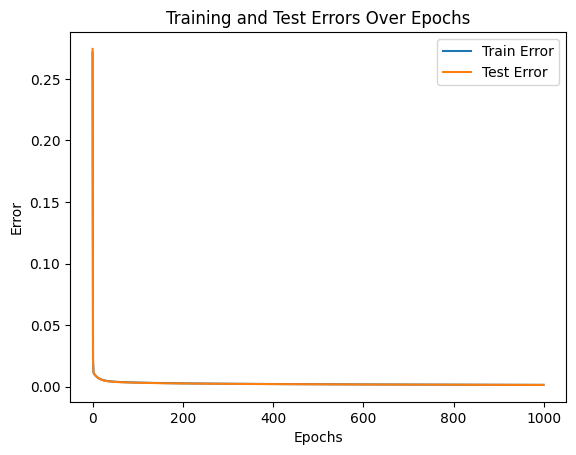

In [ ]:
from tqdm import tqdm

# برای نمونه، در اینجا دما (TOURS_temp_mean) را به‌عنوان هدف انتخاب کرده‌ایم
X = df_cleaned.drop(columns=['TOURS_temp_mean','DATE','MONTH']).values  # تمامی ویژگی‌ها به جز TOURS_temp_mean
y = df_cleaned['TOURS_temp_mean'].values  # هدف: دمای شهر Tours

# تقسیم داده‌ها به مجموعه آموزش و آزمون (80% آموزش و 20% آزمون)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
# تابع پیش‌بینی مدل (رگرسیون خطی درجه 1)
def predict(X, weights):
    return np.dot(X, weights)

# تابع محاسبه خطا (MSE)
def compute_error(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# تابع محاسبه گرادیان (برای رگرسیون چندجمله‌ای درجه 1)
def compute_gradient(X, y_true, y_pred):
    return -2 * np.dot(X.T, (y_true - y_pred)) / len(y_true)

# تابع بروزرسانی وزن‌ها
def update_weights(weights, learning_rate, gradient):
    return weights - learning_rate * gradient

# حلقه آموزش مدل
def train_model(X_train, y_train, X_test, y_test, learning_rate=0.01, max_epochs=1000, tolerance=0.001):
    # وزن‌های اولیه مدل (آغاز از صفر)
    weights = np.zeros((X_train.shape[1], 1))

    # ذخیره خطاها برای نمایش در نهایت
    train_errors = []
    test_errors = []

    # نوار پیشرفت tqdm
    for epoch in tqdm(range(max_epochs), desc="Training", ncols=100):
        # پیش‌بینی برای داده‌های آموزش و آزمون
        y_train_pred = predict(X_train, weights)
        y_test_pred = predict(X_test, weights)

        # محاسبه خطاها
        train_error = compute_error(y_train, y_train_pred)
        test_error = compute_error(y_test, y_test_pred)

        # ذخیره خطاها
        train_errors.append(train_error)
        test_errors.append(test_error)

        # محاسبه گرادیان
        gradient = compute_gradient(X_train, y_train, y_train_pred)

        # بروزرسانی وزن‌ها
        weights = update_weights(weights, learning_rate, gradient)

        # نمایش خطا برای داده‌های آموزش و آزمون
        tqdm.write(f'Epoch {epoch+1}/{max_epochs} - Train Error: {train_error:.4f} - Test Error: {test_error:.4f}')

        # توقف آموزش اگر خطا به حد مشخصی رسید
        if train_error < tolerance:
            print(f"\nTraining stopped at epoch {epoch+1} due to tolerance threshold.")
            break

    return weights, train_errors, test_errors

# آموزش مدل
weights, train_errors, test_errors = train_model(X_train, y_train, X_test, y_test)

# نمایش وزن‌ها نهایی
print("\nFinal weights:", weights)

# نمایش خطاها
plt.plot(train_errors, label="Train Error")
plt.plot(test_errors, label="Test Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.title("Training and Test Errors Over Epochs")
plt.show()


**1.3.1**

Linear Regression - Train MSE: 0.0000, Test MSE: 0.0000
Lasso Regression - Train MSE: 0.0300, Test MSE: 0.0296
Ridge Regression - Train MSE: 0.0000, Test MSE: 0.0000


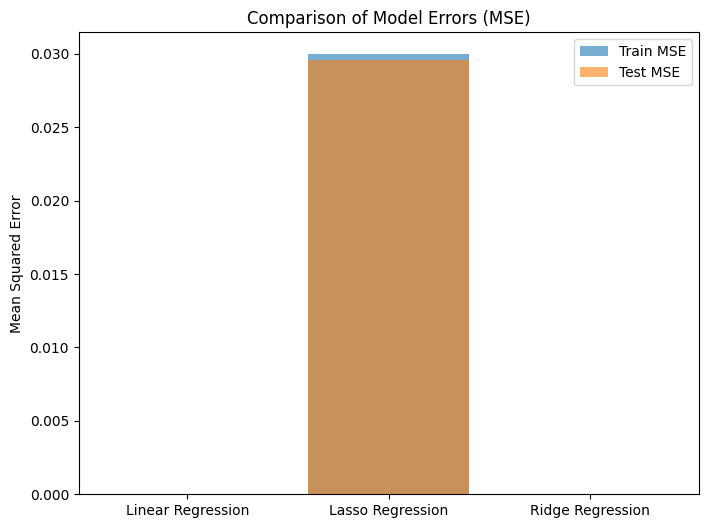


Best Model: Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# تعریف مدل‌های مختلف
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=0.1)
}

# آموزش و ارزیابی مدل‌ها
results = {}
for model_name, model in models.items():
    # آموزش مدل
    model.fit(X_train, y_train)

    # پیش‌بینی
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # محاسبه MSE برای داده‌های آموزش و آزمون
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    results[model_name] = {
        'Train Error (MSE)': train_error,
        'Test Error (MSE)': test_error,
        'Model': model
    }

# نمایش نتایج MSE برای هر مدل
for model_name, result in results.items():
    print(f"{model_name} - Train MSE: {result['Train Error (MSE)']:.4f}, Test MSE: {result['Test Error (MSE)']:.4f}")

# مقایسه خطاهای مدل‌ها
labels = list(results.keys())
train_errors = [result['Train Error (MSE)'] for result in results.values()]
test_errors = [result['Test Error (MSE)'] for result in results.values()]

# نمودار مقایسه MSE
plt.figure(figsize=(8,6))
plt.bar(labels, train_errors, alpha=0.6, label='Train MSE')
plt.bar(labels, test_errors, alpha=0.6, label='Test MSE')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Model Errors (MSE)')
plt.legend()
plt.show()

# انتخاب بهترین مدل بر اساس کمترین MSE در آزمون
best_model_name = min(results, key=lambda model: results[model]['Test Error (MSE)'])
best_model = results[best_model_name]['Model']
print(f"\nBest Model: {best_model_name}")


# امتیازی

Epoch 1/1000 - Train Error: 0.3184 - Test Error: 0.3215
Epoch 2/1000 - Train Error: 0.0256 - Test Error: 0.0256
Epoch 3/1000 - Train Error: 0.0141 - Test Error: 0.0138
Epoch 4/1000 - Train Error: 0.0129 - Test Error: 0.0126
Epoch 5/1000 - Train Error: 0.0122 - Test Error: 0.0118
Epoch 6/1000 - Train Error: 0.0115 - Test Error: 0.0112
Epoch 7/1000 - Train Error: 0.0109 - Test Error: 0.0105
Epoch 8/1000 - Train Error: 0.0103 - Test Error: 0.0100
Epoch 9/1000 - Train Error: 0.0097 - Test Error: 0.0094
Epoch 10/1000 - Train Error: 0.0093 - Test Error: 0.0090
Epoch 11/1000 - Train Error: 0.0088 - Test Error: 0.0085
Epoch 12/1000 - Train Error: 0.0084 - Test Error: 0.0081
Epoch 13/1000 - Train Error: 0.0080 - Test Error: 0.0077
Epoch 14/1000 - Train Error: 0.0077 - Test Error: 0.0074
Epoch 15/1000 - Train Error: 0.0073 - Test Error: 0.0071
Epoch 16/1000 - Train Error: 0.0070 - Test Error: 0.0068
Epoch 17/1000 - Train Error: 0.0067 - Test Error: 0.0065
Epoch 18/1000 - Train Error: 0.0065 - Te

Epoch 20/1000 - Train Error: 0.0060 - Test Error: 0.0058
Epoch 21/1000 - Train Error: 0.0058 - Test Error: 0.0056
Epoch 22/1000 - Train Error: 0.0056 - Test Error: 0.0054
Epoch 23/1000 - Train Error: 0.0055 - Test Error: 0.0053
Epoch 24/1000 - Train Error: 0.0053 - Test Error: 0.0051
Epoch 25/1000 - Train Error: 0.0052 - Test Error: 0.0050
Epoch 26/1000 - Train Error: 0.0050 - Test Error: 0.0048
Epoch 27/1000 - Train Error: 0.0049 - Test Error: 0.0047
Epoch 28/1000 - Train Error: 0.0048 - Test Error: 0.0046
Epoch 29/1000 - Train Error: 0.0046 - Test Error: 0.0045
Epoch 30/1000 - Train Error: 0.0045 - Test Error: 0.0044
Epoch 31/1000 - Train Error: 0.0044 - Test Error: 0.0043
Epoch 32/1000 - Train Error: 0.0043 - Test Error: 0.0042
Epoch 33/1000 - Train Error: 0.0043 - Test Error: 0.0041
Epoch 34/1000 - Train Error: 0.0042 - Test Error: 0.0040
Epoch 35/1000 - Train Error: 0.0041 - Test Error: 0.0040
Epoch 36/1000 - Train Error: 0.0040 - Test Error: 0.0039
Epoch 37/1000 - Train Error: 0.

Training:   5%|██▋                                               | 54/1000 [00:00<00:09, 101.60it/s]

Epoch 43/1000 - Train Error: 0.0036 - Test Error: 0.0035
Epoch 44/1000 - Train Error: 0.0036 - Test Error: 0.0035
Epoch 45/1000 - Train Error: 0.0035 - Test Error: 0.0034
Epoch 46/1000 - Train Error: 0.0035 - Test Error: 0.0034
Epoch 47/1000 - Train Error: 0.0034 - Test Error: 0.0034
Epoch 48/1000 - Train Error: 0.0034 - Test Error: 0.0033
Epoch 49/1000 - Train Error: 0.0034 - Test Error: 0.0033
Epoch 50/1000 - Train Error: 0.0033 - Test Error: 0.0033
Epoch 51/1000 - Train Error: 0.0033 - Test Error: 0.0032
Epoch 52/1000 - Train Error: 0.0033 - Test Error: 0.0032
Epoch 53/1000 - Train Error: 0.0032 - Test Error: 0.0032
Epoch 54/1000 - Train Error: 0.0032 - Test Error: 0.0031
Epoch 55/1000 - Train Error: 0.0032 - Test Error: 0.0031
Epoch 56/1000 - Train Error: 0.0031 - Test Error: 0.0031
Epoch 57/1000 - Train Error: 0.0031 - Test Error: 0.0031
Epoch 58/1000 - Train Error: 0.0031 - Test Error: 0.0030
Epoch 59/1000 - Train Error: 0.0031 - Test Error: 0.0030
Epoch 60/1000 - Train Error: 0.

Training:   8%|███▊                                              | 76/1000 [00:00<00:08, 102.97it/s]

Epoch 62/1000 - Train Error: 0.0030 - Test Error: 0.0029
Epoch 63/1000 - Train Error: 0.0030 - Test Error: 0.0029
Epoch 64/1000 - Train Error: 0.0030 - Test Error: 0.0029
Epoch 65/1000 - Train Error: 0.0029 - Test Error: 0.0029
Epoch 66/1000 - Train Error: 0.0029 - Test Error: 0.0029
Epoch 67/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 68/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 69/1000 - Train Error: 0.0029 - Test Error: 0.0028
Epoch 70/1000 - Train Error: 0.0028 - Test Error: 0.0028
Epoch 71/1000 - Train Error: 0.0028 - Test Error: 0.0028
Epoch 72/1000 - Train Error: 0.0028 - Test Error: 0.0028
Epoch 73/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 74/1000 - Train Error: 0.0028 - Test Error: 0.0027
Epoch 75/1000 - Train Error: 0.0027 - Test Error: 0.0027
Epoch 76/1000 - Train Error: 0.0027 - Test Error: 0.0027
Epoch 77/1000 - Train Error: 0.0027 - Test Error: 0.0027
Epoch 78/1000 - Train Error: 0.0027 - Test Error: 0.0027
Epoch 79/1000 - Train Error: 0.

Epoch 85/1000 - Train Error: 0.0026 - Test Error: 0.0026
Epoch 86/1000 - Train Error: 0.0026 - Test Error: 0.0026
Epoch 87/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 88/1000 - Train Error: 0.0026 - Test Error: 0.0025
Epoch 89/1000 - Train Error: 0.0025 - Test Error: 0.0025
Epoch 90/1000 - Train Error: 0.0025 - Test Error: 0.0025
Epoch 91/1000 - Train Error: 0.0025 - Test Error: 0.0025
Epoch 92/1000 - Train Error: 0.0025 - Test Error: 0.0025
Epoch 93/1000 - Train Error: 0.0025 - Test Error: 0.0025
Epoch 94/1000 - Train Error: 0.0025 - Test Error: 0.0025
Epoch 95/1000 - Train Error: 0.0025 - Test Error: 0.0025
Epoch 96/1000 - Train Error: 0.0025 - Test Error: 0.0024
Epoch 97/1000 - Train Error: 0.0024 - Test Error: 0.0024
Epoch 98/1000 - Train Error: 0.0024 - Test Error: 0.0024
Epoch 99/1000 - Train Error: 0.0024 - Test Error: 0.0024
Epoch 100/1000 - Train Error: 0.0024 - Test Error: 0.0024
Epoch 101/1000 - Train Error: 0.0024 - Test Error: 0.0024
Epoch 102/1000 - Train Error:

Training:  12%|█████▉                                           | 122/1000 [00:01<00:08, 106.36it/s]

Epoch 106/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 107/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 108/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 109/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 110/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 111/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 112/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 113/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 114/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 115/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 116/1000 - Train Error: 0.0023 - Test Error: 0.0023
Epoch 117/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 118/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 119/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 120/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 121/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 122/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 123/1000

Training:  14%|███████                                          | 144/1000 [00:01<00:08, 104.95it/s]

Epoch 129/1000 - Train Error: 0.0022 - Test Error: 0.0022
Epoch 130/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 131/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 132/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 133/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 134/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 135/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 136/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 137/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 138/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 139/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 140/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 141/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 142/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 143/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 144/1000 - Train Error: 0.0021 - Test Error: 0.0021
Epoch 145/1000 - Train Error: 0.0020 - Test Error: 0.0021
Epoch 146/1000

Training:  17%|████████▏                                        | 167/1000 [00:01<00:07, 108.12it/s]

Epoch 151/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 152/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 153/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 154/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 155/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 156/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 157/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 158/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 159/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 160/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 161/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 162/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 163/1000 - Train Error: 0.0020 - Test Error: 0.0020
Epoch 164/1000 - Train Error: 0.0019 - Test Error: 0.0020
Epoch 165/1000 - Train Error: 0.0019 - Test Error: 0.0020
Epoch 166/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 167/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 168/1000

Training:  19%|█████████▎                                       | 189/1000 [00:01<00:08, 100.57it/s]

Epoch 172/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 173/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 174/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 175/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 176/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 177/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 178/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 179/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 180/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 181/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 182/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 183/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 184/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 185/1000 - Train Error: 0.0019 - Test Error: 0.0019
Epoch 186/1000 - Train Error: 0.0018 - Test Error: 0.0019
Epoch 187/1000 - Train Error: 0.0018 - Test Error: 0.0019
Epoch 188/1000 - Train Error: 0.0018 - Test Error: 0.0019
Epoch 189/1000

Epoch 192/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 193/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 194/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 195/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 196/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 197/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 198/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 199/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 200/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 201/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 202/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 203/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 204/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 205/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 206/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 207/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 208/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 209/1000

Training:  23%|███████████▌                                      | 230/1000 [00:02<00:07, 96.83it/s]

Epoch 211/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 212/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 213/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 214/1000 - Train Error: 0.0018 - Test Error: 0.0018
Epoch 215/1000 - Train Error: 0.0017 - Test Error: 0.0018
Epoch 216/1000 - Train Error: 0.0017 - Test Error: 0.0018
Epoch 217/1000 - Train Error: 0.0017 - Test Error: 0.0018
Epoch 218/1000 - Train Error: 0.0017 - Test Error: 0.0018
Epoch 219/1000 - Train Error: 0.0017 - Test Error: 0.0018
Epoch 220/1000 - Train Error: 0.0017 - Test Error: 0.0018
Epoch 221/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 222/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 223/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 224/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 225/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 226/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 227/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 228/1000

Training:  24%|████████████                                      | 240/1000 [00:02<00:08, 93.75it/s]

Epoch 231/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 232/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 233/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 234/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 235/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 236/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 237/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 238/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 239/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 240/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 241/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 242/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 243/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 244/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 245/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 246/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 247/1000 - Train Error: 0.0017 - Test Error: 0.0017
Epoch 248/1000

Training:  26%|█████████████                                     | 262/1000 [00:02<00:07, 95.17it/s]

Epoch 252/1000 - Train Error: 0.0016 - Test Error: 0.0017
Epoch 253/1000 - Train Error: 0.0016 - Test Error: 0.0017
Epoch 254/1000 - Train Error: 0.0016 - Test Error: 0.0017
Epoch 255/1000 - Train Error: 0.0016 - Test Error: 0.0017
Epoch 256/1000 - Train Error: 0.0016 - Test Error: 0.0017
Epoch 257/1000 - Train Error: 0.0016 - Test Error: 0.0017
Epoch 258/1000 - Train Error: 0.0016 - Test Error: 0.0017
Epoch 259/1000 - Train Error: 0.0016 - Test Error: 0.0017
Epoch 260/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 261/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 262/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 263/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 264/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 265/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 266/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 267/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 268/1000 - Train Error: 0.0016 - Test Error: 0.0016


Training:  28%|██████████████                                    | 282/1000 [00:02<00:08, 84.42it/s]

Epoch 269/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 270/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 271/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 272/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 273/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 274/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 275/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 276/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 277/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 278/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 279/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 280/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 281/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 282/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 283/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 284/1000 - Train Error: 0.0016 - Test Error: 0.0016


Training:  30%|███████████████                                   | 300/1000 [00:03<00:08, 83.11it/s]

Epoch 285/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 286/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 287/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 288/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 289/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 290/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 291/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 292/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 293/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 294/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 295/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 296/1000 - Train Error: 0.0016 - Test Error: 0.0016
Epoch 297/1000 - Train Error: 0.0015 - Test Error: 0.0016
Epoch 298/1000 - Train Error: 0.0015 - Test Error: 0.0016
Epoch 299/1000 - Train Error: 0.0015 - Test Error: 0.0016
Epoch 300/1000 - Train Error: 0.0015 - Test Error: 0.0016
Epoch 301/1000 - Train Error: 0.0015 - Test Error: 0.0016


Training:  31%|███████████████▍                                  | 309/1000 [00:03<00:08, 84.31it/s]

Epoch 302/1000 - Train Error: 0.0015 - Test Error: 0.0016
Epoch 303/1000 - Train Error: 0.0015 - Test Error: 0.0016
Epoch 304/1000 - Train Error: 0.0015 - Test Error: 0.0016
Epoch 305/1000 - Train Error: 0.0015 - Test Error: 0.0016
Epoch 306/1000 - Train Error: 0.0015 - Test Error: 0.0016
Epoch 307/1000 - Train Error: 0.0015 - Test Error: 0.0016
Epoch 308/1000 - Train Error: 0.0015 - Test Error: 0.0016
Epoch 309/1000 - Train Error: 0.0015 - Test Error: 0.0016
Epoch 310/1000 - Train Error: 0.0015 - Test Error: 0.0016
Epoch 311/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 312/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 313/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 314/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 315/1000 - Train Error: 0.0015 - Test Error: 0.0015


Training:  33%|████████████████▎                                 | 326/1000 [00:03<00:09, 73.46it/s]

Epoch 316/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 317/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 318/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 319/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 320/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 321/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 322/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 323/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 324/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 325/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 326/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 327/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 328/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 329/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 330/1000 - Train Error: 0.0015 - Test Error: 0.0015


Training:  34%|█████████████████                                 | 342/1000 [00:03<00:09, 71.85it/s]

Epoch 331/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 332/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 333/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 334/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 335/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 336/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 337/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 338/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 339/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 340/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 341/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 342/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 343/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 344/1000 - Train Error: 0.0015 - Test Error: 0.0015


Epoch 345/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 346/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 347/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 348/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 349/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 350/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 351/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 352/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 353/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 354/1000 - Train Error: 0.0015 - Test Error: 0.0015
Epoch 355/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 356/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 357/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 358/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 359/1000 - Train Error: 0.0014 - Test Error: 0.0015


Training:  38%|██████████████████▊                               | 375/1000 [00:04<00:08, 74.92it/s]

Epoch 360/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 361/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 362/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 363/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 364/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 365/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 366/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 367/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 368/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 369/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 370/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 371/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 372/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 373/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 374/1000 - Train Error: 0.0014 - Test Error: 0.0015
Epoch 375/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 376/1000 - Train Error: 0.0014 - Test Error: 0.0014


Training:  39%|███████████████████▌                              | 391/1000 [00:04<00:08, 75.67it/s]

Epoch 377/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 378/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 379/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 380/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 381/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 382/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 383/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 384/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 385/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 386/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 387/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 388/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 389/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 390/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 391/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 392/1000 - Train Error: 0.0014 - Test Error: 0.0014


Training:  41%|████████████████████▎                             | 407/1000 [00:04<00:07, 74.31it/s]

Epoch 393/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 394/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 395/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 396/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 397/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 398/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 399/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 400/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 401/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 402/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 403/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 404/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 405/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 406/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 407/1000 - Train Error: 0.0014 - Test Error: 0.0014


Training:  42%|████████████████████▊                             | 415/1000 [00:04<00:07, 73.57it/s]

Epoch 408/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 409/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 410/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 411/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 412/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 413/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 414/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 415/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 416/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 417/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 418/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 419/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 420/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 421/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 422/1000 - Train Error: 0.0014 - Test Error: 0.0014


Training:  43%|█████████████████████▌                            | 431/1000 [00:04<00:08, 70.10it/s]

Epoch 423/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 424/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 425/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 426/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 427/1000 - Train Error: 0.0014 - Test Error: 0.0014
Epoch 428/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 429/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 430/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 431/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 432/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 433/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 434/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 435/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 436/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 437/1000 - Train Error: 0.0013 - Test Error: 0.0014


Training:  45%|██████████████████████▍                           | 448/1000 [00:05<00:07, 72.91it/s]

Epoch 438/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 439/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 440/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 441/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 442/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 443/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 444/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 445/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 446/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 447/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 448/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 449/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 450/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 451/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 452/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 453/1000 - Train Error: 0.0013 - Test Error: 0.0014


Training:  46%|███████████████████████▏                          | 464/1000 [00:05<00:07, 76.24it/s]

Epoch 454/1000 - Train Error: 0.0013 - Test Error: 0.0014
Epoch 455/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 456/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 457/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 458/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 459/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 460/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 461/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 462/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 463/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 464/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 465/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 466/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 467/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 468/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 469/1000 - Train Error: 0.0013 - Test Error: 0.0013


Training:  48%|████████████████████████                          | 480/1000 [00:05<00:06, 75.97it/s]

Epoch 470/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 471/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 472/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 473/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 474/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 475/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 476/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 477/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 478/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 479/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 480/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 481/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 482/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 483/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 484/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 485/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 486/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 487/1000

Training:  50%|█████████████████████████                         | 500/1000 [00:05<00:05, 83.77it/s]

Epoch 488/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 489/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 490/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 491/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 492/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 493/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 494/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 495/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 496/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 497/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 498/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 499/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 500/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 501/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 502/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 503/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 504/1000 - Train Error: 0.0013 - Test Error: 0.0013


Epoch 505/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 506/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 507/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 508/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 509/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 510/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 511/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 512/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 513/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 514/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 515/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 516/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 517/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 518/1000 - Train Error: 0.0013 - Test Error: 0.0013
Epoch 519/1000 - Train Error: 0.0012 - Test Error: 0.0013


Training:  53%|██████████████████████████▎                       | 527/1000 [00:06<00:05, 80.16it/s]

Epoch 520/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 521/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 522/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 523/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 524/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 525/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 526/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 527/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 528/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 529/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 530/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 531/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 532/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 533/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 534/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 535/1000 - Train Error: 0.0012 - Test Error: 0.0013


Training:  54%|███████████████████████████▏                      | 544/1000 [00:06<00:06, 75.81it/s]

Epoch 536/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 537/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 538/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 539/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 540/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 541/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 542/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 543/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 544/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 545/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 546/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 547/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 548/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 549/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 550/1000 - Train Error: 0.0012 - Test Error: 0.0013


Training:  56%|████████████████████████████                      | 560/1000 [00:06<00:05, 73.37it/s]

Epoch 551/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 552/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 553/1000 - Train Error: 0.0012 - Test Error: 0.0013
Epoch 554/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 555/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 556/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 557/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 558/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 559/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 560/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 561/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 562/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 563/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 564/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 565/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 566/1000 - Train Error: 0.0012 - Test Error: 0.0012


Training:  58%|████████████████████████████▊                     | 576/1000 [00:06<00:05, 73.80it/s]

Epoch 567/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 568/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 569/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 570/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 571/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 572/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 573/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 574/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 575/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 576/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 577/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 578/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 579/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 580/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 581/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 582/1000 - Train Error: 0.0012 - Test Error: 0.0012


Training:  59%|█████████████████████████████▋                    | 593/1000 [00:07<00:05, 70.84it/s]

Epoch 583/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 584/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 585/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 586/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 587/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 588/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 589/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 590/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 591/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 592/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 593/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 594/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 595/1000 - Train Error: 0.0012 - Test Error: 0.0012


Training:  61%|██████████████████████████████▌                   | 610/1000 [00:07<00:05, 74.82it/s]

Epoch 596/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 597/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 598/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 599/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 600/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 601/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 602/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 603/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 604/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 605/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 606/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 607/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 608/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 609/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 610/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 611/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 612/1000 - Train Error: 0.0012 - Test Error: 0.0012


Training:  63%|███████████████████████████████▎                  | 626/1000 [00:07<00:04, 75.71it/s]

Epoch 613/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 614/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 615/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 616/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 617/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 618/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 619/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 620/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 621/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 622/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 623/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 624/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 625/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 626/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 627/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 628/1000 - Train Error: 0.0012 - Test Error: 0.0012


Training:  63%|███████████████████████████████▋                  | 634/1000 [00:07<00:04, 73.33it/s]

Epoch 629/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 630/1000 - Train Error: 0.0012 - Test Error: 0.0012
Epoch 631/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 632/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 633/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 634/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 635/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 636/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 637/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 638/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 639/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 640/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 641/1000 - Train Error: 0.0011 - Test Error: 0.0012


Training:  65%|████████████████████████████████▌                 | 650/1000 [00:07<00:04, 72.86it/s]

Epoch 642/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 643/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 644/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 645/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 646/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 647/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 648/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 649/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 650/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 651/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 652/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 653/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 654/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 655/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 656/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 657/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 658/1000 - Train Error: 0.0011 - Test Error: 0.0012


Training:  67%|█████████████████████████████████▍                | 668/1000 [00:08<00:04, 76.66it/s]

Epoch 659/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 660/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 661/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 662/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 663/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 664/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 665/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 666/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 667/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 668/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 669/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 670/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 671/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 672/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 673/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 674/1000 - Train Error: 0.0011 - Test Error: 0.0012


Training:  68%|██████████████████████████████████▏               | 684/1000 [00:08<00:04, 76.11it/s]

Epoch 675/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 676/1000 - Train Error: 0.0011 - Test Error: 0.0012
Epoch 677/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 678/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 679/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 680/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 681/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 682/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 683/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 684/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 685/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 686/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 687/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 688/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 689/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 690/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 691/1000 - Train Error: 0.0011 - Test Error: 0.0011


Training:  70%|███████████████████████████████████               | 702/1000 [00:08<00:03, 79.63it/s]

Epoch 692/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 693/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 694/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 695/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 696/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 697/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 698/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 699/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 700/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 701/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 702/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 703/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 704/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 705/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 706/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 707/1000 - Train Error: 0.0011 - Test Error: 0.0011


Training:  72%|████████████████████████████████████              | 720/1000 [00:08<00:03, 77.11it/s]

Epoch 708/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 709/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 710/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 711/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 712/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 713/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 714/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 715/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 716/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 717/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 718/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 719/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 720/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 721/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 722/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 723/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 724/1000 - Train Error: 0.0011 - Test Error: 0.0011


Training:  74%|█████████████████████████████████████             | 740/1000 [00:08<00:03, 79.51it/s]

Epoch 725/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 726/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 727/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 728/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 729/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 730/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 731/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 732/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 733/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 734/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 735/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 736/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 737/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 738/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 739/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 740/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 741/1000 - Train Error: 0.0011 - Test Error: 0.0011


Training:  75%|█████████████████████████████████████▌            | 750/1000 [00:09<00:02, 83.83it/s]

Epoch 742/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 743/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 744/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 745/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 746/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 747/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 748/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 749/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 750/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 751/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 752/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 753/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 754/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 755/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 756/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 757/1000 - Train Error: 0.0011 - Test Error: 0.0011


Training:  77%|██████████████████████████████████████▎           | 767/1000 [00:09<00:02, 79.08it/s]

Epoch 758/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 759/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 760/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 761/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 762/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 763/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 764/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 765/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 766/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 767/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 768/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 769/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 770/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 771/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 772/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 773/1000 - Train Error: 0.0011 - Test Error: 0.0011
Epoch 774/1000 - Train Error: 0.0010 - Test Error: 0.0011


Training:  78%|███████████████████████████████████████▏          | 784/1000 [00:09<00:02, 78.27it/s]

Epoch 775/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 776/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 777/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 778/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 779/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 780/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 781/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 782/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 783/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 784/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 785/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 786/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 787/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 788/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 789/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 790/1000 - Train Error: 0.0010 - Test Error: 0.0011


Training:  80%|████████████████████████████████████████          | 802/1000 [00:09<00:02, 81.96it/s]

Epoch 791/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 792/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 793/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 794/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 795/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 796/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 797/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 798/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 799/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 800/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 801/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 802/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 803/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 804/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 805/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 806/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 807/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 808/1000

Training:  82%|█████████████████████████████████████████         | 820/1000 [00:09<00:02, 78.31it/s]

Epoch 809/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 810/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 811/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 812/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 813/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 814/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 815/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 816/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 817/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 818/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 819/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 820/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 821/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 822/1000 - Train Error: 0.0010 - Test Error: 0.0011


Training:  84%|█████████████████████████████████████████▊        | 836/1000 [00:10<00:02, 74.18it/s]

Epoch 823/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 824/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 825/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 826/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 827/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 828/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 829/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 830/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 831/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 832/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 833/1000 - Train Error: 0.0010 - Test Error: 0.0011
Epoch 834/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 835/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 836/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 837/1000 - Train Error: 0.0010 - Test Error: 0.0010


Training:  85%|██████████████████████████████████████████▌       | 852/1000 [00:10<00:02, 71.16it/s]

Epoch 838/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 839/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 840/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 841/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 842/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 843/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 844/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 845/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 846/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 847/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 848/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 849/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 850/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 851/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 852/1000 - Train Error: 0.0010 - Test Error: 0.0010


Training:  86%|██████████████████████████████████████████▉       | 859/1000 [00:10<00:01, 81.75it/s]


Epoch 853/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 854/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 855/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 856/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 857/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 858/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 859/1000 - Train Error: 0.0010 - Test Error: 0.0010
Epoch 860/1000 - Train Error: 0.0010 - Test Error: 0.0010

Training stopped at epoch 860 due to tolerance threshold.

Final weights: [[ 8.48521489e-03]
 [-2.54971073e-02]
 [-9.15857518e-03]
 [ 1.89988050e-02]
 [-3.35244039e-03]
 [ 1.29089506e-02]
 [ 4.37577356e-02]
 [ 4.41604664e-02]
 [ 2.83724929e-03]
 [ 1.03930410e-03]
 [-1.48986767e-03]
 [ 1.32421133e-03]
 [-3.69809896e-04]
 [ 3.12212138e-04]
 [ 1.52476536e-02]
 [ 1.52437104e-02]
 [-6.91422701e-04]
 [ 2.11789611e-04]
 [ 2.69813848e-03]
 [-5.41583895e-04]
 [-6.31364471e-03]
 [-1.84287042e-04]
 [ 9.73916917e-04]
 [-1.23966484e-03]
 [ 1.

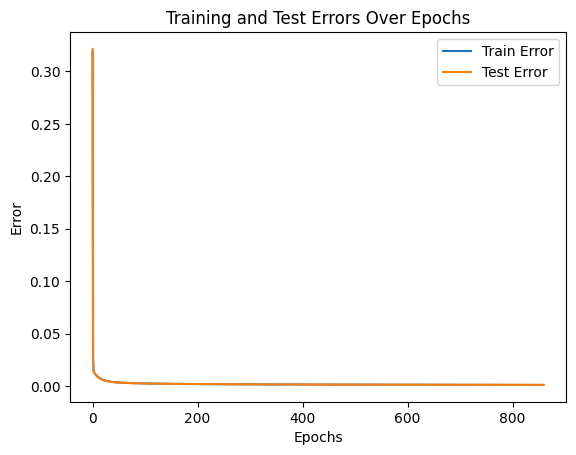

In [ ]:
from tqdm import tqdm

# برای نمونه، در اینجا دما (BASEL_temp_mean) را به‌عنوان هدف انتخاب کرده‌ایم
X = df_cleaned.drop(columns=['BASEL_temp_mean','DATE','MONTH']).values  # تمامی ویژگی‌ها به جز BASEL_temp_mean
y = df_cleaned['BASEL_temp_mean'].values  # هدف: دمای شهر BASEL

# تقسیم داده‌ها به مجموعه آموزش و آزمون (80% آموزش و 20% آزمون)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
# تابع پیش‌بینی مدل (رگرسیون خطی درجه 1)
def predict(X, weights):
    return np.dot(X, weights)

# تابع محاسبه خطا (MSE)
def compute_error(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# تابع محاسبه گرادیان (برای رگرسیون چندجمله‌ای درجه 1)
def compute_gradient(X, y_true, y_pred):
    return -2 * np.dot(X.T, (y_true - y_pred)) / len(y_true)

# تابع بروزرسانی وزن‌ها
def update_weights(weights, learning_rate, gradient):
    return weights - learning_rate * gradient

# حلقه آموزش مدل
def train_model(X_train, y_train, X_test, y_test, learning_rate=0.01, max_epochs=1000, tolerance=0.001):
    # وزن‌های اولیه مدل (آغاز از صفر)
    weights = np.zeros((X_train.shape[1], 1))

    # ذخیره خطاها برای نمایش در نهایت
    train_errors = []
    test_errors = []

    # نوار پیشرفت tqdm
    for epoch in tqdm(range(max_epochs), desc="Training", ncols=100):
        # پیش‌بینی برای داده‌های آموزش و آزمون
        y_train_pred = predict(X_train, weights)
        y_test_pred = predict(X_test, weights)

        # محاسبه خطاها
        train_error = compute_error(y_train, y_train_pred)
        test_error = compute_error(y_test, y_test_pred)

        # ذخیره خطاها
        train_errors.append(train_error)
        test_errors.append(test_error)

        # محاسبه گرادیان
        gradient = compute_gradient(X_train, y_train, y_train_pred)

        # بروزرسانی وزن‌ها
        weights = update_weights(weights, learning_rate, gradient)

        # نمایش خطا برای داده‌های آموزش و آزمون
        tqdm.write(f'Epoch {epoch+1}/{max_epochs} - Train Error: {train_error:.4f} - Test Error: {test_error:.4f}')

        # توقف آموزش اگر خطا به حد مشخصی رسید
        if train_error < tolerance:
            print(f"\nTraining stopped at epoch {epoch+1} due to tolerance threshold.")
            break

    return weights, train_errors, test_errors

# آموزش مدل
weights, train_errors, test_errors = train_model(X_train, y_train, X_test, y_test)

# نمایش وزن‌ها نهایی
print("\nFinal weights:", weights)

# نمایش خطاها
plt.plot(train_errors, label="Train Error")
plt.plot(test_errors, label="Test Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.title("Training and Test Errors Over Epochs")
plt.show()


Linear Regression - Train MSE: 0.0001, Test MSE: 0.0001
Lasso Regression - Train MSE: 0.0376, Test MSE: 0.0368
Ridge Regression - Train MSE: 0.0001, Test MSE: 0.0001


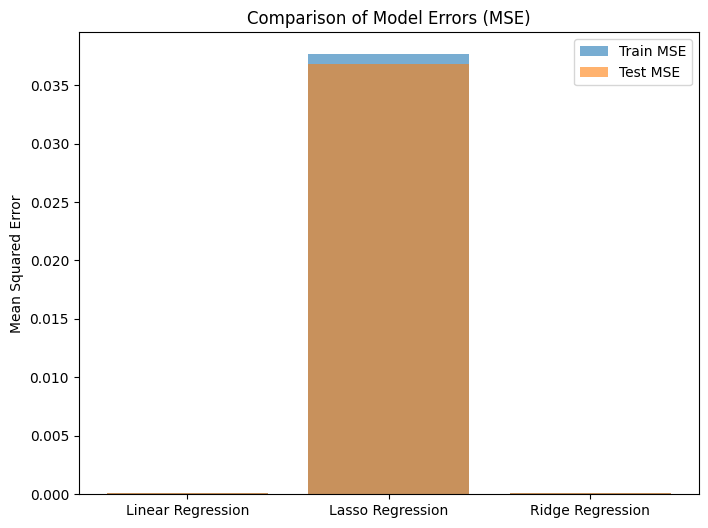


Best Model: Ridge Regression


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# تعریف مدل‌های مختلف
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=0.1)
}

# آموزش و ارزیابی مدل‌ها
results = {}
for model_name, model in models.items():
    # آموزش مدل
    model.fit(X_train, y_train)

    # پیش‌بینی
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # محاسبه MSE برای داده‌های آموزش و آزمون
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    results[model_name] = {
        'Train Error (MSE)': train_error,
        'Test Error (MSE)': test_error,
        'Model': model
    }

# نمایش نتایج MSE برای هر مدل
for model_name, result in results.items():
    print(f"{model_name} - Train MSE: {result['Train Error (MSE)']:.4f}, Test MSE: {result['Test Error (MSE)']:.4f}")

# مقایسه خطاهای مدل‌ها
labels = list(results.keys())
train_errors = [result['Train Error (MSE)'] for result in results.values()]
test_errors = [result['Test Error (MSE)'] for result in results.values()]

# نمودار مقایسه MSE
plt.figure(figsize=(8,6))
plt.bar(labels, train_errors, alpha=0.6, label='Train MSE')
plt.bar(labels, test_errors, alpha=0.6, label='Test MSE')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Model Errors (MSE)')
plt.legend()
plt.show()

# انتخاب بهترین مدل بر اساس کمترین MSE در آزمون
best_model_name = min(results, key=lambda model: results[model]['Test Error (MSE)'])
best_model = results[best_model_name]['Model']
print(f"\nBest Model: {best_model_name}")


Training:   1%|▌                                                  | 10/1000 [00:00<00:10, 92.36it/s]

Epoch 1/1000 - Train Error: 0.3048 - Test Error: 0.3005
Epoch 2/1000 - Train Error: 0.0286 - Test Error: 0.0273
Epoch 3/1000 - Train Error: 0.0177 - Test Error: 0.0172
Epoch 4/1000 - Train Error: 0.0165 - Test Error: 0.0161
Epoch 5/1000 - Train Error: 0.0156 - Test Error: 0.0153
Epoch 6/1000 - Train Error: 0.0149 - Test Error: 0.0146
Epoch 7/1000 - Train Error: 0.0142 - Test Error: 0.0139
Epoch 8/1000 - Train Error: 0.0136 - Test Error: 0.0133
Epoch 9/1000 - Train Error: 0.0130 - Test Error: 0.0127
Epoch 10/1000 - Train Error: 0.0124 - Test Error: 0.0122
Epoch 11/1000 - Train Error: 0.0119 - Test Error: 0.0117
Epoch 12/1000 - Train Error: 0.0115 - Test Error: 0.0112
Epoch 13/1000 - Train Error: 0.0110 - Test Error: 0.0108
Epoch 14/1000 - Train Error: 0.0106 - Test Error: 0.0104
Epoch 15/1000 - Train Error: 0.0103 - Test Error: 0.0101
Epoch 16/1000 - Train Error: 0.0099 - Test Error: 0.0098
Epoch 17/1000 - Train Error: 0.0096 - Test Error: 0.0094
Epoch 18/1000 - Train Error: 0.0093 - Te

Training:   3%|█▋                                                | 34/1000 [00:00<00:08, 109.82it/s]

Epoch 22/1000 - Train Error: 0.0083 - Test Error: 0.0082
Epoch 23/1000 - Train Error: 0.0081 - Test Error: 0.0080
Epoch 24/1000 - Train Error: 0.0079 - Test Error: 0.0078
Epoch 25/1000 - Train Error: 0.0078 - Test Error: 0.0077
Epoch 26/1000 - Train Error: 0.0076 - Test Error: 0.0075
Epoch 27/1000 - Train Error: 0.0074 - Test Error: 0.0074
Epoch 28/1000 - Train Error: 0.0073 - Test Error: 0.0072
Epoch 29/1000 - Train Error: 0.0072 - Test Error: 0.0071
Epoch 30/1000 - Train Error: 0.0070 - Test Error: 0.0070
Epoch 31/1000 - Train Error: 0.0069 - Test Error: 0.0068
Epoch 32/1000 - Train Error: 0.0068 - Test Error: 0.0067
Epoch 33/1000 - Train Error: 0.0067 - Test Error: 0.0066
Epoch 34/1000 - Train Error: 0.0066 - Test Error: 0.0065
Epoch 35/1000 - Train Error: 0.0065 - Test Error: 0.0064
Epoch 36/1000 - Train Error: 0.0064 - Test Error: 0.0064
Epoch 37/1000 - Train Error: 0.0063 - Test Error: 0.0063
Epoch 38/1000 - Train Error: 0.0062 - Test Error: 0.0062
Epoch 39/1000 - Train Error: 0.

Training:   6%|██▉                                               | 58/1000 [00:00<00:08, 110.05it/s]

Epoch 46/1000 - Train Error: 0.0057 - Test Error: 0.0057
Epoch 47/1000 - Train Error: 0.0056 - Test Error: 0.0056
Epoch 48/1000 - Train Error: 0.0056 - Test Error: 0.0056
Epoch 49/1000 - Train Error: 0.0055 - Test Error: 0.0056
Epoch 50/1000 - Train Error: 0.0055 - Test Error: 0.0055
Epoch 51/1000 - Train Error: 0.0054 - Test Error: 0.0055
Epoch 52/1000 - Train Error: 0.0054 - Test Error: 0.0054
Epoch 53/1000 - Train Error: 0.0054 - Test Error: 0.0054
Epoch 54/1000 - Train Error: 0.0053 - Test Error: 0.0053
Epoch 55/1000 - Train Error: 0.0053 - Test Error: 0.0053
Epoch 56/1000 - Train Error: 0.0052 - Test Error: 0.0053
Epoch 57/1000 - Train Error: 0.0052 - Test Error: 0.0052
Epoch 58/1000 - Train Error: 0.0052 - Test Error: 0.0052
Epoch 59/1000 - Train Error: 0.0051 - Test Error: 0.0052
Epoch 60/1000 - Train Error: 0.0051 - Test Error: 0.0051
Epoch 61/1000 - Train Error: 0.0051 - Test Error: 0.0051
Epoch 62/1000 - Train Error: 0.0050 - Test Error: 0.0051
Epoch 63/1000 - Train Error: 0.

Epoch 69/1000 - Train Error: 0.0048 - Test Error: 0.0049
Epoch 70/1000 - Train Error: 0.0048 - Test Error: 0.0048
Epoch 71/1000 - Train Error: 0.0048 - Test Error: 0.0048
Epoch 72/1000 - Train Error: 0.0047 - Test Error: 0.0048
Epoch 73/1000 - Train Error: 0.0047 - Test Error: 0.0048
Epoch 74/1000 - Train Error: 0.0047 - Test Error: 0.0047
Epoch 75/1000 - Train Error: 0.0047 - Test Error: 0.0047
Epoch 76/1000 - Train Error: 0.0046 - Test Error: 0.0047
Epoch 77/1000 - Train Error: 0.0046 - Test Error: 0.0047
Epoch 78/1000 - Train Error: 0.0046 - Test Error: 0.0047
Epoch 79/1000 - Train Error: 0.0046 - Test Error: 0.0046
Epoch 80/1000 - Train Error: 0.0045 - Test Error: 0.0046
Epoch 81/1000 - Train Error: 0.0045 - Test Error: 0.0046
Epoch 82/1000 - Train Error: 0.0045 - Test Error: 0.0046
Epoch 83/1000 - Train Error: 0.0045 - Test Error: 0.0046
Epoch 84/1000 - Train Error: 0.0045 - Test Error: 0.0045
Epoch 85/1000 - Train Error: 0.0044 - Test Error: 0.0045
Epoch 86/1000 - Train Error: 0.

Training:  11%|█████▏                                           | 106/1000 [00:01<00:07, 112.64it/s]

Epoch 92/1000 - Train Error: 0.0043 - Test Error: 0.0044
Epoch 93/1000 - Train Error: 0.0043 - Test Error: 0.0044
Epoch 94/1000 - Train Error: 0.0043 - Test Error: 0.0044
Epoch 95/1000 - Train Error: 0.0043 - Test Error: 0.0043
Epoch 96/1000 - Train Error: 0.0042 - Test Error: 0.0043
Epoch 97/1000 - Train Error: 0.0042 - Test Error: 0.0043
Epoch 98/1000 - Train Error: 0.0042 - Test Error: 0.0043
Epoch 99/1000 - Train Error: 0.0042 - Test Error: 0.0043
Epoch 100/1000 - Train Error: 0.0042 - Test Error: 0.0043
Epoch 101/1000 - Train Error: 0.0042 - Test Error: 0.0043
Epoch 102/1000 - Train Error: 0.0042 - Test Error: 0.0042
Epoch 103/1000 - Train Error: 0.0041 - Test Error: 0.0042
Epoch 104/1000 - Train Error: 0.0041 - Test Error: 0.0042
Epoch 105/1000 - Train Error: 0.0041 - Test Error: 0.0042
Epoch 106/1000 - Train Error: 0.0041 - Test Error: 0.0042
Epoch 107/1000 - Train Error: 0.0041 - Test Error: 0.0042
Epoch 108/1000 - Train Error: 0.0041 - Test Error: 0.0042
Epoch 109/1000 - Train

Training:  13%|██████▎                                          | 129/1000 [00:01<00:08, 102.73it/s]

Epoch 114/1000 - Train Error: 0.0040 - Test Error: 0.0041
Epoch 115/1000 - Train Error: 0.0040 - Test Error: 0.0041
Epoch 116/1000 - Train Error: 0.0040 - Test Error: 0.0041
Epoch 117/1000 - Train Error: 0.0040 - Test Error: 0.0040
Epoch 118/1000 - Train Error: 0.0039 - Test Error: 0.0040
Epoch 119/1000 - Train Error: 0.0039 - Test Error: 0.0040
Epoch 120/1000 - Train Error: 0.0039 - Test Error: 0.0040
Epoch 121/1000 - Train Error: 0.0039 - Test Error: 0.0040
Epoch 122/1000 - Train Error: 0.0039 - Test Error: 0.0040
Epoch 123/1000 - Train Error: 0.0039 - Test Error: 0.0040
Epoch 124/1000 - Train Error: 0.0039 - Test Error: 0.0040
Epoch 125/1000 - Train Error: 0.0039 - Test Error: 0.0040
Epoch 126/1000 - Train Error: 0.0039 - Test Error: 0.0040
Epoch 127/1000 - Train Error: 0.0038 - Test Error: 0.0039
Epoch 128/1000 - Train Error: 0.0038 - Test Error: 0.0039
Epoch 129/1000 - Train Error: 0.0038 - Test Error: 0.0039
Epoch 130/1000 - Train Error: 0.0038 - Test Error: 0.0039
Epoch 131/1000

Epoch 134/1000 - Train Error: 0.0038 - Test Error: 0.0039
Epoch 135/1000 - Train Error: 0.0038 - Test Error: 0.0039
Epoch 136/1000 - Train Error: 0.0038 - Test Error: 0.0039
Epoch 137/1000 - Train Error: 0.0037 - Test Error: 0.0039
Epoch 138/1000 - Train Error: 0.0037 - Test Error: 0.0038
Epoch 139/1000 - Train Error: 0.0037 - Test Error: 0.0038
Epoch 140/1000 - Train Error: 0.0037 - Test Error: 0.0038
Epoch 141/1000 - Train Error: 0.0037 - Test Error: 0.0038
Epoch 142/1000 - Train Error: 0.0037 - Test Error: 0.0038
Epoch 143/1000 - Train Error: 0.0037 - Test Error: 0.0038
Epoch 144/1000 - Train Error: 0.0037 - Test Error: 0.0038
Epoch 145/1000 - Train Error: 0.0037 - Test Error: 0.0038
Epoch 146/1000 - Train Error: 0.0037 - Test Error: 0.0038
Epoch 147/1000 - Train Error: 0.0037 - Test Error: 0.0038
Epoch 148/1000 - Train Error: 0.0037 - Test Error: 0.0038
Epoch 149/1000 - Train Error: 0.0036 - Test Error: 0.0038
Epoch 150/1000 - Train Error: 0.0036 - Test Error: 0.0038
Epoch 151/1000

Training:  17%|████████▌                                        | 174/1000 [00:01<00:07, 106.37it/s]

Epoch 155/1000 - Train Error: 0.0036 - Test Error: 0.0037
Epoch 156/1000 - Train Error: 0.0036 - Test Error: 0.0037
Epoch 157/1000 - Train Error: 0.0036 - Test Error: 0.0037
Epoch 158/1000 - Train Error: 0.0036 - Test Error: 0.0037
Epoch 159/1000 - Train Error: 0.0036 - Test Error: 0.0037
Epoch 160/1000 - Train Error: 0.0036 - Test Error: 0.0037
Epoch 161/1000 - Train Error: 0.0036 - Test Error: 0.0037
Epoch 162/1000 - Train Error: 0.0036 - Test Error: 0.0037
Epoch 163/1000 - Train Error: 0.0035 - Test Error: 0.0037
Epoch 164/1000 - Train Error: 0.0035 - Test Error: 0.0037
Epoch 165/1000 - Train Error: 0.0035 - Test Error: 0.0037
Epoch 166/1000 - Train Error: 0.0035 - Test Error: 0.0036
Epoch 167/1000 - Train Error: 0.0035 - Test Error: 0.0036
Epoch 168/1000 - Train Error: 0.0035 - Test Error: 0.0036
Epoch 169/1000 - Train Error: 0.0035 - Test Error: 0.0036
Epoch 170/1000 - Train Error: 0.0035 - Test Error: 0.0036
Epoch 171/1000 - Train Error: 0.0035 - Test Error: 0.0036
Epoch 172/1000

Training:  20%|█████████▋                                       | 197/1000 [00:01<00:07, 106.53it/s]

Epoch 177/1000 - Train Error: 0.0035 - Test Error: 0.0036
Epoch 178/1000 - Train Error: 0.0035 - Test Error: 0.0036
Epoch 179/1000 - Train Error: 0.0034 - Test Error: 0.0036
Epoch 180/1000 - Train Error: 0.0034 - Test Error: 0.0036
Epoch 181/1000 - Train Error: 0.0034 - Test Error: 0.0036
Epoch 182/1000 - Train Error: 0.0034 - Test Error: 0.0036
Epoch 183/1000 - Train Error: 0.0034 - Test Error: 0.0035
Epoch 184/1000 - Train Error: 0.0034 - Test Error: 0.0035
Epoch 185/1000 - Train Error: 0.0034 - Test Error: 0.0035
Epoch 186/1000 - Train Error: 0.0034 - Test Error: 0.0035
Epoch 187/1000 - Train Error: 0.0034 - Test Error: 0.0035
Epoch 188/1000 - Train Error: 0.0034 - Test Error: 0.0035
Epoch 189/1000 - Train Error: 0.0034 - Test Error: 0.0035
Epoch 190/1000 - Train Error: 0.0034 - Test Error: 0.0035
Epoch 191/1000 - Train Error: 0.0034 - Test Error: 0.0035
Epoch 192/1000 - Train Error: 0.0034 - Test Error: 0.0035
Epoch 193/1000 - Train Error: 0.0034 - Test Error: 0.0035
Epoch 194/1000

Epoch 199/1000 - Train Error: 0.0033 - Test Error: 0.0035
Epoch 200/1000 - Train Error: 0.0033 - Test Error: 0.0035
Epoch 201/1000 - Train Error: 0.0033 - Test Error: 0.0035
Epoch 202/1000 - Train Error: 0.0033 - Test Error: 0.0035
Epoch 203/1000 - Train Error: 0.0033 - Test Error: 0.0035
Epoch 204/1000 - Train Error: 0.0033 - Test Error: 0.0035
Epoch 205/1000 - Train Error: 0.0033 - Test Error: 0.0034
Epoch 206/1000 - Train Error: 0.0033 - Test Error: 0.0034
Epoch 207/1000 - Train Error: 0.0033 - Test Error: 0.0034
Epoch 208/1000 - Train Error: 0.0033 - Test Error: 0.0034
Epoch 209/1000 - Train Error: 0.0033 - Test Error: 0.0034
Epoch 210/1000 - Train Error: 0.0033 - Test Error: 0.0034
Epoch 211/1000 - Train Error: 0.0033 - Test Error: 0.0034
Epoch 212/1000 - Train Error: 0.0033 - Test Error: 0.0034
Epoch 213/1000 - Train Error: 0.0033 - Test Error: 0.0034
Epoch 214/1000 - Train Error: 0.0033 - Test Error: 0.0034
Epoch 215/1000 - Train Error: 0.0033 - Test Error: 0.0034
Epoch 216/1000

Training:  23%|███████████▌                                      | 230/1000 [00:02<00:07, 97.04it/s]

Epoch 218/1000 - Train Error: 0.0033 - Test Error: 0.0034
Epoch 219/1000 - Train Error: 0.0033 - Test Error: 0.0034
Epoch 220/1000 - Train Error: 0.0033 - Test Error: 0.0034
Epoch 221/1000 - Train Error: 0.0033 - Test Error: 0.0034
Epoch 222/1000 - Train Error: 0.0032 - Test Error: 0.0034
Epoch 223/1000 - Train Error: 0.0032 - Test Error: 0.0034
Epoch 224/1000 - Train Error: 0.0032 - Test Error: 0.0034
Epoch 225/1000 - Train Error: 0.0032 - Test Error: 0.0034
Epoch 226/1000 - Train Error: 0.0032 - Test Error: 0.0034
Epoch 227/1000 - Train Error: 0.0032 - Test Error: 0.0034
Epoch 228/1000 - Train Error: 0.0032 - Test Error: 0.0034
Epoch 229/1000 - Train Error: 0.0032 - Test Error: 0.0034
Epoch 230/1000 - Train Error: 0.0032 - Test Error: 0.0033
Epoch 231/1000 - Train Error: 0.0032 - Test Error: 0.0033
Epoch 232/1000 - Train Error: 0.0032 - Test Error: 0.0033
Epoch 233/1000 - Train Error: 0.0032 - Test Error: 0.0033
Epoch 234/1000 - Train Error: 0.0032 - Test Error: 0.0033
Epoch 235/1000

Training:  25%|████████████▌                                     | 250/1000 [00:02<00:07, 94.96it/s]

Epoch 238/1000 - Train Error: 0.0032 - Test Error: 0.0033
Epoch 239/1000 - Train Error: 0.0032 - Test Error: 0.0033
Epoch 240/1000 - Train Error: 0.0032 - Test Error: 0.0033
Epoch 241/1000 - Train Error: 0.0032 - Test Error: 0.0033
Epoch 242/1000 - Train Error: 0.0032 - Test Error: 0.0033
Epoch 243/1000 - Train Error: 0.0032 - Test Error: 0.0033
Epoch 244/1000 - Train Error: 0.0032 - Test Error: 0.0033
Epoch 245/1000 - Train Error: 0.0032 - Test Error: 0.0033
Epoch 246/1000 - Train Error: 0.0032 - Test Error: 0.0033
Epoch 247/1000 - Train Error: 0.0032 - Test Error: 0.0033
Epoch 248/1000 - Train Error: 0.0032 - Test Error: 0.0033
Epoch 249/1000 - Train Error: 0.0032 - Test Error: 0.0033
Epoch 250/1000 - Train Error: 0.0031 - Test Error: 0.0033
Epoch 251/1000 - Train Error: 0.0031 - Test Error: 0.0033
Epoch 252/1000 - Train Error: 0.0031 - Test Error: 0.0033
Epoch 253/1000 - Train Error: 0.0031 - Test Error: 0.0033
Epoch 254/1000 - Train Error: 0.0031 - Test Error: 0.0033
Epoch 255/1000

Training:  27%|█████████████▌                                    | 270/1000 [00:02<00:07, 96.03it/s]

Epoch 257/1000 - Train Error: 0.0031 - Test Error: 0.0033
Epoch 258/1000 - Train Error: 0.0031 - Test Error: 0.0033
Epoch 259/1000 - Train Error: 0.0031 - Test Error: 0.0033
Epoch 260/1000 - Train Error: 0.0031 - Test Error: 0.0033
Epoch 261/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 262/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 263/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 264/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 265/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 266/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 267/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 268/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 269/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 270/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 271/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 272/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 273/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 274/1000

Training:  29%|██████████████▍                                   | 290/1000 [00:02<00:07, 95.84it/s]

Epoch 277/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 278/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 279/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 280/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 281/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 282/1000 - Train Error: 0.0031 - Test Error: 0.0032
Epoch 283/1000 - Train Error: 0.0030 - Test Error: 0.0032
Epoch 284/1000 - Train Error: 0.0030 - Test Error: 0.0032
Epoch 285/1000 - Train Error: 0.0030 - Test Error: 0.0032
Epoch 286/1000 - Train Error: 0.0030 - Test Error: 0.0032
Epoch 287/1000 - Train Error: 0.0030 - Test Error: 0.0032
Epoch 288/1000 - Train Error: 0.0030 - Test Error: 0.0032
Epoch 289/1000 - Train Error: 0.0030 - Test Error: 0.0032
Epoch 290/1000 - Train Error: 0.0030 - Test Error: 0.0032
Epoch 291/1000 - Train Error: 0.0030 - Test Error: 0.0032
Epoch 292/1000 - Train Error: 0.0030 - Test Error: 0.0032
Epoch 293/1000 - Train Error: 0.0030 - Test Error: 0.0032
Epoch 294/1000

Epoch 298/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 299/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 300/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 301/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 302/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 303/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 304/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 305/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 306/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 307/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 308/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 309/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 310/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 311/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 312/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 313/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 314/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 315/1000

Training:  33%|████████████████▎                                | 333/1000 [00:03<00:06, 102.43it/s]

Epoch 319/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 320/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 321/1000 - Train Error: 0.0030 - Test Error: 0.0031
Epoch 322/1000 - Train Error: 0.0029 - Test Error: 0.0031
Epoch 323/1000 - Train Error: 0.0029 - Test Error: 0.0031
Epoch 324/1000 - Train Error: 0.0029 - Test Error: 0.0031
Epoch 325/1000 - Train Error: 0.0029 - Test Error: 0.0031
Epoch 326/1000 - Train Error: 0.0029 - Test Error: 0.0031
Epoch 327/1000 - Train Error: 0.0029 - Test Error: 0.0031
Epoch 328/1000 - Train Error: 0.0029 - Test Error: 0.0031
Epoch 329/1000 - Train Error: 0.0029 - Test Error: 0.0031
Epoch 330/1000 - Train Error: 0.0029 - Test Error: 0.0031
Epoch 331/1000 - Train Error: 0.0029 - Test Error: 0.0031
Epoch 332/1000 - Train Error: 0.0029 - Test Error: 0.0031
Epoch 333/1000 - Train Error: 0.0029 - Test Error: 0.0031
Epoch 334/1000 - Train Error: 0.0029 - Test Error: 0.0031
Epoch 335/1000 - Train Error: 0.0029 - Test Error: 0.0031
Epoch 336/1000

Epoch 341/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 342/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 343/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 344/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 345/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 346/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 347/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 348/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 349/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 350/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 351/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 352/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 353/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 354/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 355/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 356/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 357/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 358/1000

Training:  38%|██████████████████▊                               | 376/1000 [00:03<00:06, 94.91it/s]

Epoch 360/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 361/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 362/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 363/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 364/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 365/1000 - Train Error: 0.0029 - Test Error: 0.0030
Epoch 366/1000 - Train Error: 0.0028 - Test Error: 0.0030
Epoch 367/1000 - Train Error: 0.0028 - Test Error: 0.0030
Epoch 368/1000 - Train Error: 0.0028 - Test Error: 0.0030
Epoch 369/1000 - Train Error: 0.0028 - Test Error: 0.0030
Epoch 370/1000 - Train Error: 0.0028 - Test Error: 0.0030
Epoch 371/1000 - Train Error: 0.0028 - Test Error: 0.0030
Epoch 372/1000 - Train Error: 0.0028 - Test Error: 0.0030
Epoch 373/1000 - Train Error: 0.0028 - Test Error: 0.0030
Epoch 374/1000 - Train Error: 0.0028 - Test Error: 0.0030
Epoch 375/1000 - Train Error: 0.0028 - Test Error: 0.0030
Epoch 376/1000 - Train Error: 0.0028 - Test Error: 0.0030
Epoch 377/1000

Training:  40%|███████████████████▊                              | 397/1000 [00:03<00:06, 97.33it/s]

Epoch 379/1000 - Train Error: 0.0028 - Test Error: 0.0030
Epoch 380/1000 - Train Error: 0.0028 - Test Error: 0.0030
Epoch 381/1000 - Train Error: 0.0028 - Test Error: 0.0030
Epoch 382/1000 - Train Error: 0.0028 - Test Error: 0.0030
Epoch 383/1000 - Train Error: 0.0028 - Test Error: 0.0030
Epoch 384/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 385/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 386/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 387/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 388/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 389/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 390/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 391/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 392/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 393/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 394/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 395/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 396/1000

Epoch 400/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 401/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 402/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 403/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 404/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 405/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 406/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 407/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 408/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 409/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 410/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 411/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 412/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 413/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 414/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 415/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 416/1000 - Train Error: 0.0028 - Test Error: 0.0029
Epoch 417/1000

Training:  43%|█████████████████████▍                            | 429/1000 [00:04<00:05, 96.26it/s]

Epoch 418/1000 - Train Error: 0.0027 - Test Error: 0.0029
Epoch 419/1000 - Train Error: 0.0027 - Test Error: 0.0029
Epoch 420/1000 - Train Error: 0.0027 - Test Error: 0.0029
Epoch 421/1000 - Train Error: 0.0027 - Test Error: 0.0029
Epoch 422/1000 - Train Error: 0.0027 - Test Error: 0.0029
Epoch 423/1000 - Train Error: 0.0027 - Test Error: 0.0029
Epoch 424/1000 - Train Error: 0.0027 - Test Error: 0.0029
Epoch 425/1000 - Train Error: 0.0027 - Test Error: 0.0029
Epoch 426/1000 - Train Error: 0.0027 - Test Error: 0.0029
Epoch 427/1000 - Train Error: 0.0027 - Test Error: 0.0029
Epoch 428/1000 - Train Error: 0.0027 - Test Error: 0.0029
Epoch 429/1000 - Train Error: 0.0027 - Test Error: 0.0029
Epoch 430/1000 - Train Error: 0.0027 - Test Error: 0.0029
Epoch 431/1000 - Train Error: 0.0027 - Test Error: 0.0029
Epoch 432/1000 - Train Error: 0.0027 - Test Error: 0.0029
Epoch 433/1000 - Train Error: 0.0027 - Test Error: 0.0029
Epoch 434/1000 - Train Error: 0.0027 - Test Error: 0.0029
Epoch 435/1000

Epoch 438/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 439/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 440/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 441/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 442/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 443/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 444/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 445/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 446/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 447/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 448/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 449/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 450/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 451/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 452/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 453/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 454/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 455/1000

Training:  47%|███████████████████████▌                          | 472/1000 [00:04<00:05, 96.06it/s]

Epoch 460/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 461/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 462/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 463/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 464/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 465/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 466/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 467/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 468/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 469/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 470/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 471/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 472/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 473/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 474/1000 - Train Error: 0.0027 - Test Error: 0.0028
Epoch 475/1000 - Train Error: 0.0026 - Test Error: 0.0028


Epoch 476/1000 - Train Error: 0.0026 - Test Error: 0.0028
Epoch 477/1000 - Train Error: 0.0026 - Test Error: 0.0028
Epoch 478/1000 - Train Error: 0.0026 - Test Error: 0.0028
Epoch 479/1000 - Train Error: 0.0026 - Test Error: 0.0028
Epoch 480/1000 - Train Error: 0.0026 - Test Error: 0.0028
Epoch 481/1000 - Train Error: 0.0026 - Test Error: 0.0028
Epoch 482/1000 - Train Error: 0.0026 - Test Error: 0.0028
Epoch 483/1000 - Train Error: 0.0026 - Test Error: 0.0028
Epoch 484/1000 - Train Error: 0.0026 - Test Error: 0.0028
Epoch 485/1000 - Train Error: 0.0026 - Test Error: 0.0028
Epoch 486/1000 - Train Error: 0.0026 - Test Error: 0.0028
Epoch 487/1000 - Train Error: 0.0026 - Test Error: 0.0028
Epoch 488/1000 - Train Error: 0.0026 - Test Error: 0.0028
Epoch 489/1000 - Train Error: 0.0026 - Test Error: 0.0028
Epoch 490/1000 - Train Error: 0.0026 - Test Error: 0.0028
Epoch 491/1000 - Train Error: 0.0026 - Test Error: 0.0028
Epoch 492/1000 - Train Error: 0.0026 - Test Error: 0.0028
Epoch 493/1000

Training:  50%|█████████████████████████                         | 502/1000 [00:05<00:05, 85.80it/s]

Epoch 494/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 495/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 496/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 497/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 498/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 499/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 500/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 501/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 502/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 503/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 504/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 505/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 506/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 507/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 508/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 509/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 510/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 511/1000

Training:  52%|██████████████████████████▏                       | 523/1000 [00:05<00:05, 92.11it/s]

Epoch 512/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 513/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 514/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 515/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 516/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 517/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 518/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 519/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 520/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 521/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 522/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 523/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 524/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 525/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 526/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 527/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 528/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 529/1000

Training:  54%|███████████████████████████▏                      | 543/1000 [00:05<00:05, 88.22it/s]

Epoch 531/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 532/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 533/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 534/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 535/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 536/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 537/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 538/1000 - Train Error: 0.0026 - Test Error: 0.0027
Epoch 539/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 540/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 541/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 542/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 543/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 544/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 545/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 546/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 547/1000 - Train Error: 0.0025 - Test Error: 0.0027


Epoch 548/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 549/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 550/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 551/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 552/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 553/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 554/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 555/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 556/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 557/1000 - Train Error: 0.0025 - Test Error: 0.0027
Epoch 558/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 559/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 560/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 561/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 562/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 563/1000 - Train Error: 0.0025 - Test Error: 0.0026


Training:  58%|████████████████████████████▉                     | 579/1000 [00:05<00:05, 83.50it/s]

Epoch 564/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 565/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 566/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 567/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 568/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 569/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 570/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 571/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 572/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 573/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 574/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 575/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 576/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 577/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 578/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 579/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 580/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 581/1000

Training:  59%|█████████████████████████████▍                    | 588/1000 [00:06<00:05, 80.77it/s]

Epoch 582/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 583/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 584/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 585/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 586/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 587/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 588/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 589/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 590/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 591/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 592/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 593/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 594/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 595/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 596/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 597/1000 - Train Error: 0.0025 - Test Error: 0.0026


Epoch 598/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 599/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 600/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 601/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 602/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 603/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 604/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 605/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 606/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 607/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 608/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 609/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 610/1000 - Train Error: 0.0025 - Test Error: 0.0026
Epoch 611/1000 - Train Error: 0.0024 - Test Error: 0.0026
Epoch 612/1000 - Train Error: 0.0024 - Test Error: 0.0026
Epoch 613/1000 - Train Error: 0.0024 - Test Error: 0.0026
Epoch 614/1000 - Train Error: 0.0024 - Test Error: 0.0026
Epoch 615/1000

Training:  62%|███████████████████████████████▎                  | 625/1000 [00:06<00:04, 83.43it/s]

Epoch 616/1000 - Train Error: 0.0024 - Test Error: 0.0026
Epoch 617/1000 - Train Error: 0.0024 - Test Error: 0.0026
Epoch 618/1000 - Train Error: 0.0024 - Test Error: 0.0026
Epoch 619/1000 - Train Error: 0.0024 - Test Error: 0.0026
Epoch 620/1000 - Train Error: 0.0024 - Test Error: 0.0026
Epoch 621/1000 - Train Error: 0.0024 - Test Error: 0.0026
Epoch 622/1000 - Train Error: 0.0024 - Test Error: 0.0026
Epoch 623/1000 - Train Error: 0.0024 - Test Error: 0.0026
Epoch 624/1000 - Train Error: 0.0024 - Test Error: 0.0026
Epoch 625/1000 - Train Error: 0.0024 - Test Error: 0.0026
Epoch 626/1000 - Train Error: 0.0024 - Test Error: 0.0026
Epoch 627/1000 - Train Error: 0.0024 - Test Error: 0.0026
Epoch 628/1000 - Train Error: 0.0024 - Test Error: 0.0026
Epoch 629/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 630/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 631/1000 - Train Error: 0.0024 - Test Error: 0.0025


Training:  64%|████████████████████████████████▏                 | 643/1000 [00:06<00:04, 79.68it/s]

Epoch 632/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 633/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 634/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 635/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 636/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 637/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 638/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 639/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 640/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 641/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 642/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 643/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 644/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 645/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 646/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 647/1000 - Train Error: 0.0024 - Test Error: 0.0025


Training:  66%|█████████████████████████████████                 | 661/1000 [00:07<00:04, 80.96it/s]

Epoch 648/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 649/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 650/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 651/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 652/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 653/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 654/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 655/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 656/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 657/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 658/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 659/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 660/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 661/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 662/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 663/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 664/1000 - Train Error: 0.0024 - Test Error: 0.0025


Training:  68%|█████████████████████████████████▉                | 678/1000 [00:07<00:04, 76.93it/s]

Epoch 665/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 666/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 667/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 668/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 669/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 670/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 671/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 672/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 673/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 674/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 675/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 676/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 677/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 678/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 679/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 680/1000 - Train Error: 0.0024 - Test Error: 0.0025


Training:  70%|██████████████████████████████████▊               | 695/1000 [00:07<00:03, 78.13it/s]

Epoch 681/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 682/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 683/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 684/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 685/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 686/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 687/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 688/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 689/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 690/1000 - Train Error: 0.0024 - Test Error: 0.0025
Epoch 691/1000 - Train Error: 0.0023 - Test Error: 0.0025
Epoch 692/1000 - Train Error: 0.0023 - Test Error: 0.0025
Epoch 693/1000 - Train Error: 0.0023 - Test Error: 0.0025
Epoch 694/1000 - Train Error: 0.0023 - Test Error: 0.0025
Epoch 695/1000 - Train Error: 0.0023 - Test Error: 0.0025
Epoch 696/1000 - Train Error: 0.0023 - Test Error: 0.0025


Training:  71%|███████████████████████████████████▌              | 711/1000 [00:07<00:03, 76.29it/s]

Epoch 697/1000 - Train Error: 0.0023 - Test Error: 0.0025
Epoch 698/1000 - Train Error: 0.0023 - Test Error: 0.0025
Epoch 699/1000 - Train Error: 0.0023 - Test Error: 0.0025
Epoch 700/1000 - Train Error: 0.0023 - Test Error: 0.0025
Epoch 701/1000 - Train Error: 0.0023 - Test Error: 0.0025
Epoch 702/1000 - Train Error: 0.0023 - Test Error: 0.0025
Epoch 703/1000 - Train Error: 0.0023 - Test Error: 0.0025
Epoch 704/1000 - Train Error: 0.0023 - Test Error: 0.0025
Epoch 705/1000 - Train Error: 0.0023 - Test Error: 0.0025
Epoch 706/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 707/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 708/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 709/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 710/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 711/1000 - Train Error: 0.0023 - Test Error: 0.0024


Training:  72%|████████████████████████████████████              | 720/1000 [00:07<00:03, 77.71it/s]

Epoch 712/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 713/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 714/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 715/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 716/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 717/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 718/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 719/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 720/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 721/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 722/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 723/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 724/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 725/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 726/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 727/1000 - Train Error: 0.0023 - Test Error: 0.0024


Training:  74%|████████████████████████████████████▊             | 736/1000 [00:08<00:03, 76.42it/s]

Epoch 728/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 729/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 730/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 731/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 732/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 733/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 734/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 735/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 736/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 737/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 738/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 739/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 740/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 741/1000 - Train Error: 0.0023 - Test Error: 0.0024


Training:  75%|█████████████████████████████████████▌            | 752/1000 [00:08<00:03, 69.02it/s]

Epoch 742/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 743/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 744/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 745/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 746/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 747/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 748/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 749/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 750/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 751/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 752/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 753/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 754/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 755/1000 - Train Error: 0.0023 - Test Error: 0.0024


Training:  77%|██████████████████████████████████████▍           | 768/1000 [00:08<00:03, 74.04it/s]

Epoch 756/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 757/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 758/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 759/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 760/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 761/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 762/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 763/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 764/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 765/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 766/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 767/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 768/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 769/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 770/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 771/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 772/1000 - Train Error: 0.0023 - Test Error: 0.0024


Training:  79%|███████████████████████████████████████▎          | 787/1000 [00:08<00:02, 82.54it/s]

Epoch 773/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 774/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 775/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 776/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 777/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 778/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 779/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 780/1000 - Train Error: 0.0023 - Test Error: 0.0024
Epoch 781/1000 - Train Error: 0.0022 - Test Error: 0.0024
Epoch 782/1000 - Train Error: 0.0022 - Test Error: 0.0024
Epoch 783/1000 - Train Error: 0.0022 - Test Error: 0.0024
Epoch 784/1000 - Train Error: 0.0022 - Test Error: 0.0024
Epoch 785/1000 - Train Error: 0.0022 - Test Error: 0.0024
Epoch 786/1000 - Train Error: 0.0022 - Test Error: 0.0024
Epoch 787/1000 - Train Error: 0.0022 - Test Error: 0.0024
Epoch 788/1000 - Train Error: 0.0022 - Test Error: 0.0024
Epoch 789/1000 - Train Error: 0.0022 - Test Error: 0.0024
Epoch 790/1000

Training:  80%|████████████████████████████████████████▎         | 805/1000 [00:08<00:02, 83.02it/s]

Epoch 792/1000 - Train Error: 0.0022 - Test Error: 0.0024
Epoch 793/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 794/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 795/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 796/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 797/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 798/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 799/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 800/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 801/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 802/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 803/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 804/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 805/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 806/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 807/1000 - Train Error: 0.0022 - Test Error: 0.0023


Training:  81%|████████████████████████████████████████▋         | 814/1000 [00:09<00:02, 76.60it/s]

Epoch 808/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 809/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 810/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 811/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 812/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 813/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 814/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 815/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 816/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 817/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 818/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 819/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 820/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 821/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 822/1000 - Train Error: 0.0022 - Test Error: 0.0023


Training:  83%|█████████████████████████████████████████▌        | 831/1000 [00:09<00:02, 76.60it/s]

Epoch 823/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 824/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 825/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 826/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 827/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 828/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 829/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 830/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 831/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 832/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 833/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 834/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 835/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 836/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 837/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 838/1000 - Train Error: 0.0022 - Test Error: 0.0023


Training:  85%|██████████████████████████████████████████▍       | 848/1000 [00:09<00:02, 74.02it/s]

Epoch 839/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 840/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 841/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 842/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 843/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 844/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 845/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 846/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 847/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 848/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 849/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 850/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 851/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 852/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 853/1000 - Train Error: 0.0022 - Test Error: 0.0023


Training:  86%|███████████████████████████████████████████▎      | 865/1000 [00:09<00:01, 78.40it/s]

Epoch 854/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 855/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 856/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 857/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 858/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 859/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 860/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 861/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 862/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 863/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 864/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 865/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 866/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 867/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 868/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 869/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 870/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 871/1000

Training:  88%|████████████████████████████████████████████      | 882/1000 [00:09<00:01, 76.51it/s]

Epoch 872/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 873/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 874/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 875/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 876/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 877/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 878/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 879/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 880/1000 - Train Error: 0.0022 - Test Error: 0.0023
Epoch 881/1000 - Train Error: 0.0021 - Test Error: 0.0023
Epoch 882/1000 - Train Error: 0.0021 - Test Error: 0.0023
Epoch 883/1000 - Train Error: 0.0021 - Test Error: 0.0023
Epoch 884/1000 - Train Error: 0.0021 - Test Error: 0.0023
Epoch 885/1000 - Train Error: 0.0021 - Test Error: 0.0023
Epoch 886/1000 - Train Error: 0.0021 - Test Error: 0.0023


Epoch 887/1000 - Train Error: 0.0021 - Test Error: 0.0023
Epoch 888/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 889/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 890/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 891/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 892/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 893/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 894/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 895/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 896/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 897/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 898/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 899/1000 - Train Error: 0.0021 - Test Error: 0.0022


Training:  92%|█████████████████████████████████████████████▊    | 915/1000 [00:10<00:01, 76.75it/s]

Epoch 900/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 901/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 902/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 903/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 904/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 905/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 906/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 907/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 908/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 909/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 910/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 911/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 912/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 913/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 914/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 915/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 916/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 917/1000

Training:  93%|██████████████████████████████████████████████▌   | 932/1000 [00:10<00:00, 75.99it/s]

Epoch 918/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 919/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 920/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 921/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 922/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 923/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 924/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 925/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 926/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 927/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 928/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 929/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 930/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 931/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 932/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 933/1000 - Train Error: 0.0021 - Test Error: 0.0022


Training:  95%|███████████████████████████████████████████████▌  | 950/1000 [00:10<00:00, 79.33it/s]

Epoch 934/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 935/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 936/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 937/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 938/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 939/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 940/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 941/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 942/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 943/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 944/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 945/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 946/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 947/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 948/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 949/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 950/1000 - Train Error: 0.0021 - Test Error: 0.0022


Epoch 951/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 952/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 953/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 954/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 955/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 956/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 957/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 958/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 959/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 960/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 961/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 962/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 963/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 964/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 965/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 966/1000 - Train Error: 0.0021 - Test Error: 0.0022


Epoch 967/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 968/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 969/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 970/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 971/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 972/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 973/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 974/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 975/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 976/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 977/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 978/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 979/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 980/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 981/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 982/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 983/1000 - Train Error: 0.0021 - Test Error: 0.0022


Training: 100%|█████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.12it/s]


Epoch 984/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 985/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 986/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 987/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 988/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 989/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 990/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 991/1000 - Train Error: 0.0021 - Test Error: 0.0022
Epoch 992/1000 - Train Error: 0.0020 - Test Error: 0.0022
Epoch 993/1000 - Train Error: 0.0020 - Test Error: 0.0022
Epoch 994/1000 - Train Error: 0.0020 - Test Error: 0.0021
Epoch 995/1000 - Train Error: 0.0020 - Test Error: 0.0021
Epoch 996/1000 - Train Error: 0.0020 - Test Error: 0.0021
Epoch 997/1000 - Train Error: 0.0020 - Test Error: 0.0021
Epoch 998/1000 - Train Error: 0.0020 - Test Error: 0.0021
Epoch 999/1000 - Train Error: 0.0020 - Test Error: 0.0021
Epoch 1000/1000 - Train Error: 0.0020 - Test Error: 0.0021

Final weight

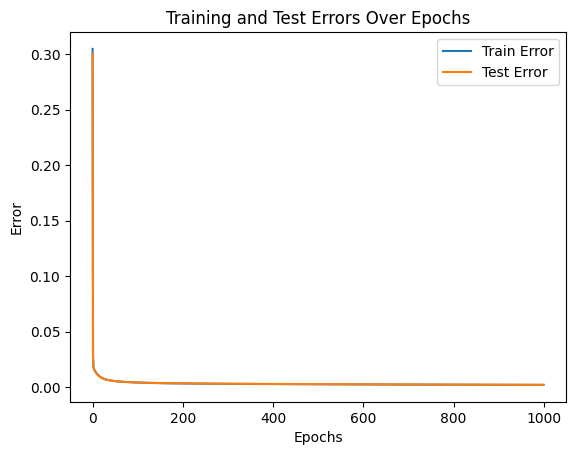

In [ ]:
from tqdm import tqdm

# برای نمونه، در اینجا دما (BUDAPEST_temp_mean) را به‌عنوان هدف انتخاب کرده‌ایم
X = df_cleaned.drop(columns=['BUDAPEST_temp_mean','DATE','MONTH']).values  # تمامی ویژگی‌ها به جز BUDAPEST_temp_mean
y = df_cleaned['BUDAPEST_temp_mean'].values  # هدف: دمای شهر BUDAPEST

# تقسیم داده‌ها به مجموعه آموزش و آزمون (80% آموزش و 20% آزمون)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
# تابع پیش‌بینی مدل (رگرسیون خطی درجه 1)
def predict(X, weights):
    return np.dot(X, weights)

# تابع محاسبه خطا (MSE)
def compute_error(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# تابع محاسبه گرادیان (برای رگرسیون چندجمله‌ای درجه 1)
def compute_gradient(X, y_true, y_pred):
    return -2 * np.dot(X.T, (y_true - y_pred)) / len(y_true)

# تابع بروزرسانی وزن‌ها
def update_weights(weights, learning_rate, gradient):
    return weights - learning_rate * gradient

# حلقه آموزش مدل
def train_model(X_train, y_train, X_test, y_test, learning_rate=0.01, max_epochs=1000, tolerance=0.001):
    # وزن‌های اولیه مدل (آغاز از صفر)
    weights = np.zeros((X_train.shape[1], 1))

    # ذخیره خطاها برای نمایش در نهایت
    train_errors = []
    test_errors = []

    # نوار پیشرفت tqdm
    for epoch in tqdm(range(max_epochs), desc="Training", ncols=100):
        # پیش‌بینی برای داده‌های آموزش و آزمون
        y_train_pred = predict(X_train, weights)
        y_test_pred = predict(X_test, weights)

        # محاسبه خطاها
        train_error = compute_error(y_train, y_train_pred)
        test_error = compute_error(y_test, y_test_pred)

        # ذخیره خطاها
        train_errors.append(train_error)
        test_errors.append(test_error)

        # محاسبه گرادیان
        gradient = compute_gradient(X_train, y_train, y_train_pred)

        # بروزرسانی وزن‌ها
        weights = update_weights(weights, learning_rate, gradient)

        # نمایش خطا برای داده‌های آموزش و آزمون
        tqdm.write(f'Epoch {epoch+1}/{max_epochs} - Train Error: {train_error:.4f} - Test Error: {test_error:.4f}')

        # توقف آموزش اگر خطا به حد مشخصی رسید
        if train_error < tolerance:
            print(f"\nTraining stopped at epoch {epoch+1} due to tolerance threshold.")
            break

    return weights, train_errors, test_errors

# آموزش مدل
weights, train_errors, test_errors = train_model(X_train, y_train, X_test, y_test)

# نمایش وزن‌ها نهایی
print("\nFinal weights:", weights)

# نمایش خطاها
plt.plot(train_errors, label="Train Error")
plt.plot(test_errors, label="Test Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.title("Training and Test Errors Over Epochs")
plt.show()


Linear Regression - Train MSE: 0.0004, Test MSE: 0.0004
Lasso Regression - Train MSE: 0.0418, Test MSE: 0.0406
Ridge Regression - Train MSE: 0.0004, Test MSE: 0.0004


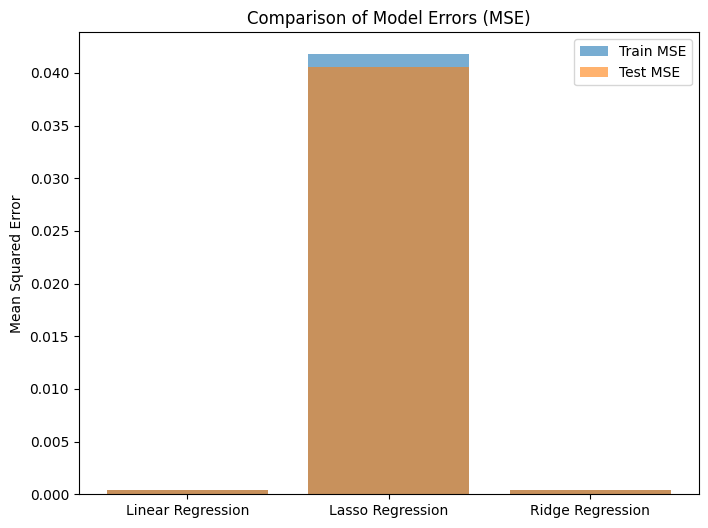


Best Model: Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# تعریف مدل‌های مختلف
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=0.1)
}

# آموزش و ارزیابی مدل‌ها
results = {}
for model_name, model in models.items():
    # آموزش مدل
    model.fit(X_train, y_train)

    # پیش‌بینی
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # محاسبه MSE برای داده‌های آموزش و آزمون
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    results[model_name] = {
        'Train Error (MSE)': train_error,
        'Test Error (MSE)': test_error,
        'Model': model
    }

# نمایش نتایج MSE برای هر مدل
for model_name, result in results.items():
    print(f"{model_name} - Train MSE: {result['Train Error (MSE)']:.4f}, Test MSE: {result['Test Error (MSE)']:.4f}")

# مقایسه خطاهای مدل‌ها
labels = list(results.keys())
train_errors = [result['Train Error (MSE)'] for result in results.values()]
test_errors = [result['Test Error (MSE)'] for result in results.values()]

# نمودار مقایسه MSE
plt.figure(figsize=(8,6))
plt.bar(labels, train_errors, alpha=0.6, label='Train MSE')
plt.bar(labels, test_errors, alpha=0.6, label='Test MSE')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Model Errors (MSE)')
plt.legend()
plt.show()

# انتخاب بهترین مدل بر اساس کمترین MSE در آزمون
best_model_name = min(results, key=lambda model: results[model]['Test Error (MSE)'])
best_model = results[best_model_name]['Model']
print(f"\nBest Model: {best_model_name}")


# امتیازی 2

Epoch 1/1000 - Train Error: 0.3048 - Test Error: 0.3005
Epoch 2/1000 - Train Error: 0.2429 - Test Error: 0.2392
Epoch 3/1000 - Train Error: 0.1971 - Test Error: 0.1938
Epoch 4/1000 - Train Error: 0.1631 - Test Error: 0.1601
Epoch 5/1000 - Train Error: 0.1379 - Test Error: 0.1352
Epoch 6/1000 - Train Error: 0.1192 - Test Error: 0.1168
Epoch 7/1000 - Train Error: 0.1053 - Test Error: 0.1031
Epoch 8/1000 - Train Error: 0.0950 - Test Error: 0.0930
Epoch 9/1000 - Train Error: 0.0873 - Test Error: 0.0855
Epoch 10/1000 - Train Error: 0.0816 - Test Error: 0.0800
Epoch 11/1000 - Train Error: 0.0773 - Test Error: 0.0759
Epoch 12/1000 - Train Error: 0.0742 - Test Error: 0.0728
Epoch 13/1000 - Train Error: 0.0718 - Test Error: 0.0705
Epoch 14/1000 - Train Error: 0.0701 - Test Error: 0.0688
Epoch 15/1000 - Train Error: 0.0687 - Test Error: 0.0676
Epoch 16/1000 - Train Error: 0.0677 - Test Error: 0.0666
Epoch 17/1000 - Train Error: 0.0670 - Test Error: 0.0659
Epoch 18/1000 - Train Error: 0.0664 - Te

Training:   6%|███                                               | 62/1000 [00:00<00:04, 195.70it/s]

Epoch 42/1000 - Train Error: 0.0633 - Test Error: 0.0626
Epoch 43/1000 - Train Error: 0.0632 - Test Error: 0.0625
Epoch 44/1000 - Train Error: 0.0632 - Test Error: 0.0625
Epoch 45/1000 - Train Error: 0.0631 - Test Error: 0.0624
Epoch 46/1000 - Train Error: 0.0630 - Test Error: 0.0623
Epoch 47/1000 - Train Error: 0.0630 - Test Error: 0.0623
Epoch 48/1000 - Train Error: 0.0629 - Test Error: 0.0622
Epoch 49/1000 - Train Error: 0.0628 - Test Error: 0.0622
Epoch 50/1000 - Train Error: 0.0628 - Test Error: 0.0621
Epoch 51/1000 - Train Error: 0.0627 - Test Error: 0.0620
Epoch 52/1000 - Train Error: 0.0626 - Test Error: 0.0620
Epoch 53/1000 - Train Error: 0.0626 - Test Error: 0.0619
Epoch 54/1000 - Train Error: 0.0625 - Test Error: 0.0618
Epoch 55/1000 - Train Error: 0.0624 - Test Error: 0.0618
Epoch 56/1000 - Train Error: 0.0624 - Test Error: 0.0617
Epoch 57/1000 - Train Error: 0.0623 - Test Error: 0.0617
Epoch 58/1000 - Train Error: 0.0623 - Test Error: 0.0616
Epoch 59/1000 - Train Error: 0.

Training:  10%|████▉                                            | 102/1000 [00:00<00:04, 191.10it/s]

Epoch 81/1000 - Train Error: 0.0608 - Test Error: 0.0602
Epoch 82/1000 - Train Error: 0.0608 - Test Error: 0.0602
Epoch 83/1000 - Train Error: 0.0607 - Test Error: 0.0601
Epoch 84/1000 - Train Error: 0.0606 - Test Error: 0.0601
Epoch 85/1000 - Train Error: 0.0606 - Test Error: 0.0600
Epoch 86/1000 - Train Error: 0.0605 - Test Error: 0.0599
Epoch 87/1000 - Train Error: 0.0605 - Test Error: 0.0599
Epoch 88/1000 - Train Error: 0.0604 - Test Error: 0.0598
Epoch 89/1000 - Train Error: 0.0604 - Test Error: 0.0598
Epoch 90/1000 - Train Error: 0.0603 - Test Error: 0.0597
Epoch 91/1000 - Train Error: 0.0602 - Test Error: 0.0597
Epoch 92/1000 - Train Error: 0.0602 - Test Error: 0.0596
Epoch 93/1000 - Train Error: 0.0601 - Test Error: 0.0595
Epoch 94/1000 - Train Error: 0.0601 - Test Error: 0.0595
Epoch 95/1000 - Train Error: 0.0600 - Test Error: 0.0594
Epoch 96/1000 - Train Error: 0.0599 - Test Error: 0.0594
Epoch 97/1000 - Train Error: 0.0599 - Test Error: 0.0593
Epoch 98/1000 - Train Error: 0.

Training:  14%|███████                                          | 145/1000 [00:00<00:04, 201.36it/s]

Epoch 120/1000 - Train Error: 0.0586 - Test Error: 0.0581
Epoch 121/1000 - Train Error: 0.0585 - Test Error: 0.0580
Epoch 122/1000 - Train Error: 0.0585 - Test Error: 0.0580
Epoch 123/1000 - Train Error: 0.0584 - Test Error: 0.0579
Epoch 124/1000 - Train Error: 0.0584 - Test Error: 0.0579
Epoch 125/1000 - Train Error: 0.0583 - Test Error: 0.0578
Epoch 126/1000 - Train Error: 0.0583 - Test Error: 0.0578
Epoch 127/1000 - Train Error: 0.0582 - Test Error: 0.0577
Epoch 128/1000 - Train Error: 0.0581 - Test Error: 0.0576
Epoch 129/1000 - Train Error: 0.0581 - Test Error: 0.0576
Epoch 130/1000 - Train Error: 0.0580 - Test Error: 0.0575
Epoch 131/1000 - Train Error: 0.0580 - Test Error: 0.0575
Epoch 132/1000 - Train Error: 0.0579 - Test Error: 0.0574
Epoch 133/1000 - Train Error: 0.0579 - Test Error: 0.0574
Epoch 134/1000 - Train Error: 0.0578 - Test Error: 0.0573
Epoch 135/1000 - Train Error: 0.0578 - Test Error: 0.0573
Epoch 136/1000 - Train Error: 0.0577 - Test Error: 0.0572
Epoch 137/1000

Epoch 163/1000 - Train Error: 0.0563 - Test Error: 0.0559
Epoch 164/1000 - Train Error: 0.0563 - Test Error: 0.0558
Epoch 165/1000 - Train Error: 0.0562 - Test Error: 0.0558
Epoch 166/1000 - Train Error: 0.0562 - Test Error: 0.0557
Epoch 167/1000 - Train Error: 0.0561 - Test Error: 0.0557
Epoch 168/1000 - Train Error: 0.0561 - Test Error: 0.0556
Epoch 169/1000 - Train Error: 0.0560 - Test Error: 0.0556
Epoch 170/1000 - Train Error: 0.0560 - Test Error: 0.0556
Epoch 171/1000 - Train Error: 0.0559 - Test Error: 0.0555
Epoch 172/1000 - Train Error: 0.0559 - Test Error: 0.0555
Epoch 173/1000 - Train Error: 0.0558 - Test Error: 0.0554
Epoch 174/1000 - Train Error: 0.0558 - Test Error: 0.0554
Epoch 175/1000 - Train Error: 0.0557 - Test Error: 0.0553
Epoch 176/1000 - Train Error: 0.0557 - Test Error: 0.0553
Epoch 177/1000 - Train Error: 0.0556 - Test Error: 0.0552
Epoch 178/1000 - Train Error: 0.0556 - Test Error: 0.0552
Epoch 179/1000 - Train Error: 0.0555 - Test Error: 0.0551
Epoch 180/1000

Epoch 201/1000 - Train Error: 0.0545 - Test Error: 0.0541
Epoch 202/1000 - Train Error: 0.0545 - Test Error: 0.0541
Epoch 203/1000 - Train Error: 0.0544 - Test Error: 0.0540
Epoch 204/1000 - Train Error: 0.0544 - Test Error: 0.0540
Epoch 205/1000 - Train Error: 0.0543 - Test Error: 0.0539
Epoch 206/1000 - Train Error: 0.0543 - Test Error: 0.0539
Epoch 207/1000 - Train Error: 0.0542 - Test Error: 0.0539
Epoch 208/1000 - Train Error: 0.0542 - Test Error: 0.0538
Epoch 209/1000 - Train Error: 0.0541 - Test Error: 0.0538
Epoch 210/1000 - Train Error: 0.0541 - Test Error: 0.0537
Epoch 211/1000 - Train Error: 0.0540 - Test Error: 0.0537
Epoch 212/1000 - Train Error: 0.0540 - Test Error: 0.0536
Epoch 213/1000 - Train Error: 0.0540 - Test Error: 0.0536
Epoch 214/1000 - Train Error: 0.0539 - Test Error: 0.0536
Epoch 215/1000 - Train Error: 0.0539 - Test Error: 0.0535
Epoch 216/1000 - Train Error: 0.0538 - Test Error: 0.0535
Epoch 217/1000 - Train Error: 0.0538 - Test Error: 0.0534
Epoch 218/1000

Epoch 237/1000 - Train Error: 0.0529 - Test Error: 0.0526
Epoch 238/1000 - Train Error: 0.0529 - Test Error: 0.0525
Epoch 239/1000 - Train Error: 0.0528 - Test Error: 0.0525
Epoch 240/1000 - Train Error: 0.0528 - Test Error: 0.0525
Epoch 241/1000 - Train Error: 0.0527 - Test Error: 0.0524
Epoch 242/1000 - Train Error: 0.0527 - Test Error: 0.0524
Epoch 243/1000 - Train Error: 0.0527 - Test Error: 0.0523
Epoch 244/1000 - Train Error: 0.0526 - Test Error: 0.0523
Epoch 245/1000 - Train Error: 0.0526 - Test Error: 0.0523
Epoch 246/1000 - Train Error: 0.0525 - Test Error: 0.0522
Epoch 247/1000 - Train Error: 0.0525 - Test Error: 0.0522
Epoch 248/1000 - Train Error: 0.0524 - Test Error: 0.0521
Epoch 249/1000 - Train Error: 0.0524 - Test Error: 0.0521
Epoch 250/1000 - Train Error: 0.0524 - Test Error: 0.0521
Epoch 251/1000 - Train Error: 0.0523 - Test Error: 0.0520
Epoch 252/1000 - Train Error: 0.0523 - Test Error: 0.0520
Epoch 253/1000 - Train Error: 0.0522 - Test Error: 0.0519
Epoch 254/1000

Epoch 273/1000 - Train Error: 0.0514 - Test Error: 0.0512
Epoch 274/1000 - Train Error: 0.0514 - Test Error: 0.0511
Epoch 275/1000 - Train Error: 0.0514 - Test Error: 0.0511
Epoch 276/1000 - Train Error: 0.0513 - Test Error: 0.0510
Epoch 277/1000 - Train Error: 0.0513 - Test Error: 0.0510
Epoch 278/1000 - Train Error: 0.0512 - Test Error: 0.0510
Epoch 279/1000 - Train Error: 0.0512 - Test Error: 0.0509
Epoch 280/1000 - Train Error: 0.0512 - Test Error: 0.0509
Epoch 281/1000 - Train Error: 0.0511 - Test Error: 0.0509
Epoch 282/1000 - Train Error: 0.0511 - Test Error: 0.0508
Epoch 283/1000 - Train Error: 0.0511 - Test Error: 0.0508
Epoch 284/1000 - Train Error: 0.0510 - Test Error: 0.0507
Epoch 285/1000 - Train Error: 0.0510 - Test Error: 0.0507
Epoch 286/1000 - Train Error: 0.0509 - Test Error: 0.0507
Epoch 287/1000 - Train Error: 0.0509 - Test Error: 0.0506
Epoch 288/1000 - Train Error: 0.0509 - Test Error: 0.0506
Epoch 289/1000 - Train Error: 0.0508 - Test Error: 0.0506
Epoch 290/1000

Epoch 306/1000 - Train Error: 0.0502 - Test Error: 0.0500
Epoch 307/1000 - Train Error: 0.0502 - Test Error: 0.0499
Epoch 308/1000 - Train Error: 0.0501 - Test Error: 0.0499
Epoch 309/1000 - Train Error: 0.0501 - Test Error: 0.0498
Epoch 310/1000 - Train Error: 0.0501 - Test Error: 0.0498
Epoch 311/1000 - Train Error: 0.0500 - Test Error: 0.0498
Epoch 312/1000 - Train Error: 0.0500 - Test Error: 0.0497
Epoch 313/1000 - Train Error: 0.0499 - Test Error: 0.0497
Epoch 314/1000 - Train Error: 0.0499 - Test Error: 0.0497
Epoch 315/1000 - Train Error: 0.0499 - Test Error: 0.0496
Epoch 316/1000 - Train Error: 0.0498 - Test Error: 0.0496
Epoch 317/1000 - Train Error: 0.0498 - Test Error: 0.0496
Epoch 318/1000 - Train Error: 0.0498 - Test Error: 0.0495
Epoch 319/1000 - Train Error: 0.0497 - Test Error: 0.0495
Epoch 320/1000 - Train Error: 0.0497 - Test Error: 0.0495
Epoch 321/1000 - Train Error: 0.0497 - Test Error: 0.0494
Epoch 322/1000 - Train Error: 0.0496 - Test Error: 0.0494
Epoch 323/1000

Training:  36%|█████████████████▋                               | 361/1000 [00:02<00:03, 178.07it/s]

Epoch 343/1000 - Train Error: 0.0489 - Test Error: 0.0487
Epoch 344/1000 - Train Error: 0.0489 - Test Error: 0.0487
Epoch 345/1000 - Train Error: 0.0488 - Test Error: 0.0486
Epoch 346/1000 - Train Error: 0.0488 - Test Error: 0.0486
Epoch 347/1000 - Train Error: 0.0488 - Test Error: 0.0486
Epoch 348/1000 - Train Error: 0.0487 - Test Error: 0.0485
Epoch 349/1000 - Train Error: 0.0487 - Test Error: 0.0485
Epoch 350/1000 - Train Error: 0.0487 - Test Error: 0.0485
Epoch 351/1000 - Train Error: 0.0486 - Test Error: 0.0484
Epoch 352/1000 - Train Error: 0.0486 - Test Error: 0.0484
Epoch 353/1000 - Train Error: 0.0486 - Test Error: 0.0484
Epoch 354/1000 - Train Error: 0.0485 - Test Error: 0.0483
Epoch 355/1000 - Train Error: 0.0485 - Test Error: 0.0483
Epoch 356/1000 - Train Error: 0.0485 - Test Error: 0.0483
Epoch 357/1000 - Train Error: 0.0484 - Test Error: 0.0482
Epoch 358/1000 - Train Error: 0.0484 - Test Error: 0.0482
Epoch 359/1000 - Train Error: 0.0484 - Test Error: 0.0482
Epoch 360/1000

Training:  40%|███████████████████▌                             | 400/1000 [00:02<00:03, 167.31it/s]

Epoch 381/1000 - Train Error: 0.0477 - Test Error: 0.0475
Epoch 382/1000 - Train Error: 0.0477 - Test Error: 0.0475
Epoch 383/1000 - Train Error: 0.0476 - Test Error: 0.0474
Epoch 384/1000 - Train Error: 0.0476 - Test Error: 0.0474
Epoch 385/1000 - Train Error: 0.0476 - Test Error: 0.0474
Epoch 386/1000 - Train Error: 0.0475 - Test Error: 0.0474
Epoch 387/1000 - Train Error: 0.0475 - Test Error: 0.0473
Epoch 388/1000 - Train Error: 0.0475 - Test Error: 0.0473
Epoch 389/1000 - Train Error: 0.0474 - Test Error: 0.0473
Epoch 390/1000 - Train Error: 0.0474 - Test Error: 0.0472
Epoch 391/1000 - Train Error: 0.0474 - Test Error: 0.0472
Epoch 392/1000 - Train Error: 0.0474 - Test Error: 0.0472
Epoch 393/1000 - Train Error: 0.0473 - Test Error: 0.0471
Epoch 394/1000 - Train Error: 0.0473 - Test Error: 0.0471
Epoch 395/1000 - Train Error: 0.0473 - Test Error: 0.0471
Epoch 396/1000 - Train Error: 0.0472 - Test Error: 0.0471
Epoch 397/1000 - Train Error: 0.0472 - Test Error: 0.0470
Epoch 398/1000

Epoch 413/1000 - Train Error: 0.0467 - Test Error: 0.0466
Epoch 414/1000 - Train Error: 0.0467 - Test Error: 0.0465
Epoch 415/1000 - Train Error: 0.0467 - Test Error: 0.0465
Epoch 416/1000 - Train Error: 0.0467 - Test Error: 0.0465
Epoch 417/1000 - Train Error: 0.0466 - Test Error: 0.0465
Epoch 418/1000 - Train Error: 0.0466 - Test Error: 0.0464
Epoch 419/1000 - Train Error: 0.0466 - Test Error: 0.0464
Epoch 420/1000 - Train Error: 0.0465 - Test Error: 0.0464
Epoch 421/1000 - Train Error: 0.0465 - Test Error: 0.0463
Epoch 422/1000 - Train Error: 0.0465 - Test Error: 0.0463
Epoch 423/1000 - Train Error: 0.0465 - Test Error: 0.0463
Epoch 424/1000 - Train Error: 0.0464 - Test Error: 0.0463
Epoch 425/1000 - Train Error: 0.0464 - Test Error: 0.0462
Epoch 426/1000 - Train Error: 0.0464 - Test Error: 0.0462
Epoch 427/1000 - Train Error: 0.0463 - Test Error: 0.0462
Epoch 428/1000 - Train Error: 0.0463 - Test Error: 0.0462
Epoch 429/1000 - Train Error: 0.0463 - Test Error: 0.0461
Epoch 430/1000

Training:  48%|███████████████████████▎                         | 476/1000 [00:02<00:03, 168.11it/s]

Epoch 450/1000 - Train Error: 0.0457 - Test Error: 0.0456
Epoch 451/1000 - Train Error: 0.0457 - Test Error: 0.0455
Epoch 452/1000 - Train Error: 0.0457 - Test Error: 0.0455
Epoch 453/1000 - Train Error: 0.0456 - Test Error: 0.0455
Epoch 454/1000 - Train Error: 0.0456 - Test Error: 0.0455
Epoch 455/1000 - Train Error: 0.0456 - Test Error: 0.0454
Epoch 456/1000 - Train Error: 0.0456 - Test Error: 0.0454
Epoch 457/1000 - Train Error: 0.0455 - Test Error: 0.0454
Epoch 458/1000 - Train Error: 0.0455 - Test Error: 0.0454
Epoch 459/1000 - Train Error: 0.0455 - Test Error: 0.0453
Epoch 460/1000 - Train Error: 0.0455 - Test Error: 0.0453
Epoch 461/1000 - Train Error: 0.0454 - Test Error: 0.0453
Epoch 462/1000 - Train Error: 0.0454 - Test Error: 0.0453
Epoch 463/1000 - Train Error: 0.0454 - Test Error: 0.0452
Epoch 464/1000 - Train Error: 0.0454 - Test Error: 0.0452
Epoch 465/1000 - Train Error: 0.0453 - Test Error: 0.0452
Epoch 466/1000 - Train Error: 0.0453 - Test Error: 0.0452
Epoch 467/1000

Training:  51%|█████████████████████████                        | 512/1000 [00:02<00:02, 166.19it/s]

Epoch 483/1000 - Train Error: 0.0449 - Test Error: 0.0447
Epoch 484/1000 - Train Error: 0.0449 - Test Error: 0.0447
Epoch 485/1000 - Train Error: 0.0448 - Test Error: 0.0447
Epoch 486/1000 - Train Error: 0.0448 - Test Error: 0.0447
Epoch 487/1000 - Train Error: 0.0448 - Test Error: 0.0446
Epoch 488/1000 - Train Error: 0.0448 - Test Error: 0.0446
Epoch 489/1000 - Train Error: 0.0447 - Test Error: 0.0446
Epoch 490/1000 - Train Error: 0.0447 - Test Error: 0.0446
Epoch 491/1000 - Train Error: 0.0447 - Test Error: 0.0445
Epoch 492/1000 - Train Error: 0.0447 - Test Error: 0.0445
Epoch 493/1000 - Train Error: 0.0446 - Test Error: 0.0445
Epoch 494/1000 - Train Error: 0.0446 - Test Error: 0.0445
Epoch 495/1000 - Train Error: 0.0446 - Test Error: 0.0444
Epoch 496/1000 - Train Error: 0.0446 - Test Error: 0.0444
Epoch 497/1000 - Train Error: 0.0445 - Test Error: 0.0444
Epoch 498/1000 - Train Error: 0.0445 - Test Error: 0.0444
Epoch 499/1000 - Train Error: 0.0445 - Test Error: 0.0444
Epoch 500/1000

Training:  55%|██████████████████████████▉                      | 549/1000 [00:03<00:02, 164.14it/s]

Epoch 517/1000 - Train Error: 0.0441 - Test Error: 0.0439
Epoch 518/1000 - Train Error: 0.0440 - Test Error: 0.0439
Epoch 519/1000 - Train Error: 0.0440 - Test Error: 0.0439
Epoch 520/1000 - Train Error: 0.0440 - Test Error: 0.0439
Epoch 521/1000 - Train Error: 0.0440 - Test Error: 0.0439
Epoch 522/1000 - Train Error: 0.0440 - Test Error: 0.0438
Epoch 523/1000 - Train Error: 0.0439 - Test Error: 0.0438
Epoch 524/1000 - Train Error: 0.0439 - Test Error: 0.0438
Epoch 525/1000 - Train Error: 0.0439 - Test Error: 0.0438
Epoch 526/1000 - Train Error: 0.0439 - Test Error: 0.0437
Epoch 527/1000 - Train Error: 0.0438 - Test Error: 0.0437
Epoch 528/1000 - Train Error: 0.0438 - Test Error: 0.0437
Epoch 529/1000 - Train Error: 0.0438 - Test Error: 0.0437
Epoch 530/1000 - Train Error: 0.0438 - Test Error: 0.0437
Epoch 531/1000 - Train Error: 0.0438 - Test Error: 0.0436
Epoch 532/1000 - Train Error: 0.0437 - Test Error: 0.0436
Epoch 533/1000 - Train Error: 0.0437 - Test Error: 0.0436
Epoch 534/1000

Training:  58%|████████████████████████████▌                    | 584/1000 [00:03<00:02, 165.44it/s]

Epoch 550/1000 - Train Error: 0.0433 - Test Error: 0.0432
Epoch 551/1000 - Train Error: 0.0433 - Test Error: 0.0432
Epoch 552/1000 - Train Error: 0.0433 - Test Error: 0.0432
Epoch 553/1000 - Train Error: 0.0433 - Test Error: 0.0432
Epoch 554/1000 - Train Error: 0.0433 - Test Error: 0.0431
Epoch 555/1000 - Train Error: 0.0432 - Test Error: 0.0431
Epoch 556/1000 - Train Error: 0.0432 - Test Error: 0.0431
Epoch 557/1000 - Train Error: 0.0432 - Test Error: 0.0431
Epoch 558/1000 - Train Error: 0.0432 - Test Error: 0.0431
Epoch 559/1000 - Train Error: 0.0432 - Test Error: 0.0430
Epoch 560/1000 - Train Error: 0.0431 - Test Error: 0.0430
Epoch 561/1000 - Train Error: 0.0431 - Test Error: 0.0430
Epoch 562/1000 - Train Error: 0.0431 - Test Error: 0.0430
Epoch 563/1000 - Train Error: 0.0431 - Test Error: 0.0429
Epoch 564/1000 - Train Error: 0.0431 - Test Error: 0.0429
Epoch 565/1000 - Train Error: 0.0430 - Test Error: 0.0429
Epoch 566/1000 - Train Error: 0.0430 - Test Error: 0.0429
Epoch 567/1000

Epoch 585/1000 - Train Error: 0.0426 - Test Error: 0.0425
Epoch 586/1000 - Train Error: 0.0426 - Test Error: 0.0425
Epoch 587/1000 - Train Error: 0.0426 - Test Error: 0.0425
Epoch 588/1000 - Train Error: 0.0426 - Test Error: 0.0424
Epoch 589/1000 - Train Error: 0.0425 - Test Error: 0.0424
Epoch 590/1000 - Train Error: 0.0425 - Test Error: 0.0424
Epoch 591/1000 - Train Error: 0.0425 - Test Error: 0.0424
Epoch 592/1000 - Train Error: 0.0425 - Test Error: 0.0424
Epoch 593/1000 - Train Error: 0.0425 - Test Error: 0.0424
Epoch 594/1000 - Train Error: 0.0424 - Test Error: 0.0423
Epoch 595/1000 - Train Error: 0.0424 - Test Error: 0.0423
Epoch 596/1000 - Train Error: 0.0424 - Test Error: 0.0423
Epoch 597/1000 - Train Error: 0.0424 - Test Error: 0.0423
Epoch 598/1000 - Train Error: 0.0424 - Test Error: 0.0423
Epoch 599/1000 - Train Error: 0.0424 - Test Error: 0.0422
Epoch 600/1000 - Train Error: 0.0423 - Test Error: 0.0422
Epoch 601/1000 - Train Error: 0.0423 - Test Error: 0.0422
Epoch 602/1000

Training:  64%|███████████████████████████████▌                 | 644/1000 [00:03<00:01, 188.17it/s]

Epoch 623/1000 - Train Error: 0.0419 - Test Error: 0.0418
Epoch 624/1000 - Train Error: 0.0419 - Test Error: 0.0418
Epoch 625/1000 - Train Error: 0.0419 - Test Error: 0.0418
Epoch 626/1000 - Train Error: 0.0419 - Test Error: 0.0417
Epoch 627/1000 - Train Error: 0.0418 - Test Error: 0.0417
Epoch 628/1000 - Train Error: 0.0418 - Test Error: 0.0417
Epoch 629/1000 - Train Error: 0.0418 - Test Error: 0.0417
Epoch 630/1000 - Train Error: 0.0418 - Test Error: 0.0417
Epoch 631/1000 - Train Error: 0.0418 - Test Error: 0.0416
Epoch 632/1000 - Train Error: 0.0417 - Test Error: 0.0416
Epoch 633/1000 - Train Error: 0.0417 - Test Error: 0.0416
Epoch 634/1000 - Train Error: 0.0417 - Test Error: 0.0416
Epoch 635/1000 - Train Error: 0.0417 - Test Error: 0.0416
Epoch 636/1000 - Train Error: 0.0417 - Test Error: 0.0416
Epoch 637/1000 - Train Error: 0.0417 - Test Error: 0.0415
Epoch 638/1000 - Train Error: 0.0416 - Test Error: 0.0415
Epoch 639/1000 - Train Error: 0.0416 - Test Error: 0.0415
Epoch 640/1000

Training:  68%|█████████████████████████████████▍               | 683/1000 [00:03<00:01, 185.75it/s]

Epoch 663/1000 - Train Error: 0.0412 - Test Error: 0.0411
Epoch 664/1000 - Train Error: 0.0412 - Test Error: 0.0411
Epoch 665/1000 - Train Error: 0.0412 - Test Error: 0.0411
Epoch 666/1000 - Train Error: 0.0412 - Test Error: 0.0410
Epoch 667/1000 - Train Error: 0.0411 - Test Error: 0.0410
Epoch 668/1000 - Train Error: 0.0411 - Test Error: 0.0410
Epoch 669/1000 - Train Error: 0.0411 - Test Error: 0.0410
Epoch 670/1000 - Train Error: 0.0411 - Test Error: 0.0410
Epoch 671/1000 - Train Error: 0.0411 - Test Error: 0.0410
Epoch 672/1000 - Train Error: 0.0411 - Test Error: 0.0409
Epoch 673/1000 - Train Error: 0.0410 - Test Error: 0.0409
Epoch 674/1000 - Train Error: 0.0410 - Test Error: 0.0409
Epoch 675/1000 - Train Error: 0.0410 - Test Error: 0.0409
Epoch 676/1000 - Train Error: 0.0410 - Test Error: 0.0409
Epoch 677/1000 - Train Error: 0.0410 - Test Error: 0.0409
Epoch 678/1000 - Train Error: 0.0410 - Test Error: 0.0408
Epoch 679/1000 - Train Error: 0.0409 - Test Error: 0.0408
Epoch 680/1000

Training:  73%|███████████████████████████████████▌             | 726/1000 [00:04<00:01, 198.06it/s]

Epoch 704/1000 - Train Error: 0.0405 - Test Error: 0.0404
Epoch 705/1000 - Train Error: 0.0405 - Test Error: 0.0404
Epoch 706/1000 - Train Error: 0.0405 - Test Error: 0.0404
Epoch 707/1000 - Train Error: 0.0405 - Test Error: 0.0404
Epoch 708/1000 - Train Error: 0.0405 - Test Error: 0.0404
Epoch 709/1000 - Train Error: 0.0405 - Test Error: 0.0404
Epoch 710/1000 - Train Error: 0.0405 - Test Error: 0.0403
Epoch 711/1000 - Train Error: 0.0404 - Test Error: 0.0403
Epoch 712/1000 - Train Error: 0.0404 - Test Error: 0.0403
Epoch 713/1000 - Train Error: 0.0404 - Test Error: 0.0403
Epoch 714/1000 - Train Error: 0.0404 - Test Error: 0.0403
Epoch 715/1000 - Train Error: 0.0404 - Test Error: 0.0403
Epoch 716/1000 - Train Error: 0.0404 - Test Error: 0.0403
Epoch 717/1000 - Train Error: 0.0404 - Test Error: 0.0402
Epoch 718/1000 - Train Error: 0.0403 - Test Error: 0.0402
Epoch 719/1000 - Train Error: 0.0403 - Test Error: 0.0402
Epoch 720/1000 - Train Error: 0.0403 - Test Error: 0.0402
Epoch 721/1000

Training:  77%|█████████████████████████████████████▋           | 768/1000 [00:04<00:01, 197.33it/s]

Epoch 747/1000 - Train Error: 0.0399 - Test Error: 0.0398
Epoch 748/1000 - Train Error: 0.0399 - Test Error: 0.0398
Epoch 749/1000 - Train Error: 0.0399 - Test Error: 0.0398
Epoch 750/1000 - Train Error: 0.0399 - Test Error: 0.0398
Epoch 751/1000 - Train Error: 0.0399 - Test Error: 0.0397
Epoch 752/1000 - Train Error: 0.0398 - Test Error: 0.0397
Epoch 753/1000 - Train Error: 0.0398 - Test Error: 0.0397
Epoch 754/1000 - Train Error: 0.0398 - Test Error: 0.0397
Epoch 755/1000 - Train Error: 0.0398 - Test Error: 0.0397
Epoch 756/1000 - Train Error: 0.0398 - Test Error: 0.0397
Epoch 757/1000 - Train Error: 0.0398 - Test Error: 0.0397
Epoch 758/1000 - Train Error: 0.0398 - Test Error: 0.0396
Epoch 759/1000 - Train Error: 0.0398 - Test Error: 0.0396
Epoch 760/1000 - Train Error: 0.0397 - Test Error: 0.0396
Epoch 761/1000 - Train Error: 0.0397 - Test Error: 0.0396
Epoch 762/1000 - Train Error: 0.0397 - Test Error: 0.0396
Epoch 763/1000 - Train Error: 0.0397 - Test Error: 0.0396
Epoch 764/1000

Training:  81%|███████████████████████████████████████▋         | 809/1000 [00:04<00:00, 196.80it/s]

Epoch 785/1000 - Train Error: 0.0394 - Test Error: 0.0393
Epoch 786/1000 - Train Error: 0.0394 - Test Error: 0.0393
Epoch 787/1000 - Train Error: 0.0394 - Test Error: 0.0393
Epoch 788/1000 - Train Error: 0.0394 - Test Error: 0.0392
Epoch 789/1000 - Train Error: 0.0394 - Test Error: 0.0392
Epoch 790/1000 - Train Error: 0.0393 - Test Error: 0.0392
Epoch 791/1000 - Train Error: 0.0393 - Test Error: 0.0392
Epoch 792/1000 - Train Error: 0.0393 - Test Error: 0.0392
Epoch 793/1000 - Train Error: 0.0393 - Test Error: 0.0392
Epoch 794/1000 - Train Error: 0.0393 - Test Error: 0.0392
Epoch 795/1000 - Train Error: 0.0393 - Test Error: 0.0392
Epoch 796/1000 - Train Error: 0.0393 - Test Error: 0.0391
Epoch 797/1000 - Train Error: 0.0393 - Test Error: 0.0391
Epoch 798/1000 - Train Error: 0.0392 - Test Error: 0.0391
Epoch 799/1000 - Train Error: 0.0392 - Test Error: 0.0391
Epoch 800/1000 - Train Error: 0.0392 - Test Error: 0.0391
Epoch 801/1000 - Train Error: 0.0392 - Test Error: 0.0391
Epoch 802/1000

Epoch 824/1000 - Train Error: 0.0389 - Test Error: 0.0388
Epoch 825/1000 - Train Error: 0.0389 - Test Error: 0.0388
Epoch 826/1000 - Train Error: 0.0389 - Test Error: 0.0388
Epoch 827/1000 - Train Error: 0.0389 - Test Error: 0.0388
Epoch 828/1000 - Train Error: 0.0389 - Test Error: 0.0387
Epoch 829/1000 - Train Error: 0.0389 - Test Error: 0.0387
Epoch 830/1000 - Train Error: 0.0388 - Test Error: 0.0387
Epoch 831/1000 - Train Error: 0.0388 - Test Error: 0.0387
Epoch 832/1000 - Train Error: 0.0388 - Test Error: 0.0387
Epoch 833/1000 - Train Error: 0.0388 - Test Error: 0.0387
Epoch 834/1000 - Train Error: 0.0388 - Test Error: 0.0387
Epoch 835/1000 - Train Error: 0.0388 - Test Error: 0.0387
Epoch 836/1000 - Train Error: 0.0388 - Test Error: 0.0386
Epoch 837/1000 - Train Error: 0.0388 - Test Error: 0.0386
Epoch 838/1000 - Train Error: 0.0388 - Test Error: 0.0386
Epoch 839/1000 - Train Error: 0.0387 - Test Error: 0.0386
Epoch 840/1000 - Train Error: 0.0387 - Test Error: 0.0386
Epoch 841/1000

Epoch 864/1000 - Train Error: 0.0385 - Test Error: 0.0383
Epoch 865/1000 - Train Error: 0.0384 - Test Error: 0.0383
Epoch 866/1000 - Train Error: 0.0384 - Test Error: 0.0383
Epoch 867/1000 - Train Error: 0.0384 - Test Error: 0.0383
Epoch 868/1000 - Train Error: 0.0384 - Test Error: 0.0383
Epoch 869/1000 - Train Error: 0.0384 - Test Error: 0.0383
Epoch 870/1000 - Train Error: 0.0384 - Test Error: 0.0383
Epoch 871/1000 - Train Error: 0.0384 - Test Error: 0.0382
Epoch 872/1000 - Train Error: 0.0384 - Test Error: 0.0382
Epoch 873/1000 - Train Error: 0.0384 - Test Error: 0.0382
Epoch 874/1000 - Train Error: 0.0383 - Test Error: 0.0382
Epoch 875/1000 - Train Error: 0.0383 - Test Error: 0.0382
Epoch 876/1000 - Train Error: 0.0383 - Test Error: 0.0382
Epoch 877/1000 - Train Error: 0.0383 - Test Error: 0.0382
Epoch 878/1000 - Train Error: 0.0383 - Test Error: 0.0382
Epoch 879/1000 - Train Error: 0.0383 - Test Error: 0.0382
Epoch 880/1000 - Train Error: 0.0383 - Test Error: 0.0381
Epoch 881/1000

Training:  93%|█████████████████████████████████████████████▌   | 929/1000 [00:05<00:00, 189.82it/s]

Epoch 903/1000 - Train Error: 0.0380 - Test Error: 0.0379
Epoch 904/1000 - Train Error: 0.0380 - Test Error: 0.0379
Epoch 905/1000 - Train Error: 0.0380 - Test Error: 0.0379
Epoch 906/1000 - Train Error: 0.0380 - Test Error: 0.0379
Epoch 907/1000 - Train Error: 0.0380 - Test Error: 0.0379
Epoch 908/1000 - Train Error: 0.0380 - Test Error: 0.0378
Epoch 909/1000 - Train Error: 0.0380 - Test Error: 0.0378
Epoch 910/1000 - Train Error: 0.0380 - Test Error: 0.0378
Epoch 911/1000 - Train Error: 0.0380 - Test Error: 0.0378
Epoch 912/1000 - Train Error: 0.0380 - Test Error: 0.0378
Epoch 913/1000 - Train Error: 0.0379 - Test Error: 0.0378
Epoch 914/1000 - Train Error: 0.0379 - Test Error: 0.0378
Epoch 915/1000 - Train Error: 0.0379 - Test Error: 0.0378
Epoch 916/1000 - Train Error: 0.0379 - Test Error: 0.0378
Epoch 917/1000 - Train Error: 0.0379 - Test Error: 0.0378
Epoch 918/1000 - Train Error: 0.0379 - Test Error: 0.0377
Epoch 919/1000 - Train Error: 0.0379 - Test Error: 0.0377
Epoch 920/1000

Epoch 939/1000 - Train Error: 0.0377 - Test Error: 0.0375
Epoch 940/1000 - Train Error: 0.0377 - Test Error: 0.0375
Epoch 941/1000 - Train Error: 0.0377 - Test Error: 0.0375
Epoch 942/1000 - Train Error: 0.0377 - Test Error: 0.0375
Epoch 943/1000 - Train Error: 0.0376 - Test Error: 0.0375
Epoch 944/1000 - Train Error: 0.0376 - Test Error: 0.0375
Epoch 945/1000 - Train Error: 0.0376 - Test Error: 0.0375
Epoch 946/1000 - Train Error: 0.0376 - Test Error: 0.0375
Epoch 947/1000 - Train Error: 0.0376 - Test Error: 0.0375
Epoch 948/1000 - Train Error: 0.0376 - Test Error: 0.0374
Epoch 949/1000 - Train Error: 0.0376 - Test Error: 0.0374
Epoch 950/1000 - Train Error: 0.0376 - Test Error: 0.0374
Epoch 951/1000 - Train Error: 0.0376 - Test Error: 0.0374
Epoch 952/1000 - Train Error: 0.0376 - Test Error: 0.0374
Epoch 953/1000 - Train Error: 0.0376 - Test Error: 0.0374
Epoch 954/1000 - Train Error: 0.0375 - Test Error: 0.0374
Epoch 955/1000 - Train Error: 0.0375 - Test Error: 0.0374
Epoch 956/1000

Training: 100%|████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 184.23it/s]


Epoch 977/1000 - Train Error: 0.0373 - Test Error: 0.0372
Epoch 978/1000 - Train Error: 0.0373 - Test Error: 0.0372
Epoch 979/1000 - Train Error: 0.0373 - Test Error: 0.0372
Epoch 980/1000 - Train Error: 0.0373 - Test Error: 0.0372
Epoch 981/1000 - Train Error: 0.0373 - Test Error: 0.0371
Epoch 982/1000 - Train Error: 0.0373 - Test Error: 0.0371
Epoch 983/1000 - Train Error: 0.0373 - Test Error: 0.0371
Epoch 984/1000 - Train Error: 0.0373 - Test Error: 0.0371
Epoch 985/1000 - Train Error: 0.0373 - Test Error: 0.0371
Epoch 986/1000 - Train Error: 0.0373 - Test Error: 0.0371
Epoch 987/1000 - Train Error: 0.0373 - Test Error: 0.0371
Epoch 988/1000 - Train Error: 0.0372 - Test Error: 0.0371
Epoch 989/1000 - Train Error: 0.0372 - Test Error: 0.0371
Epoch 990/1000 - Train Error: 0.0372 - Test Error: 0.0371
Epoch 991/1000 - Train Error: 0.0372 - Test Error: 0.0371
Epoch 992/1000 - Train Error: 0.0372 - Test Error: 0.0370
Epoch 993/1000 - Train Error: 0.0372 - Test Error: 0.0370
Epoch 994/1000

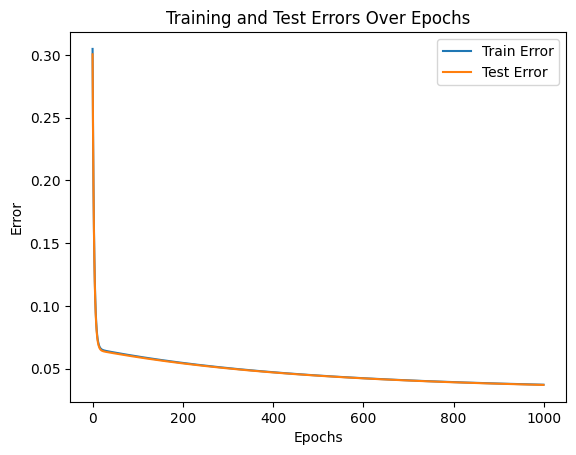

In [ ]:
from tqdm import tqdm

# برای نمونه، در اینجا دما (BUDAPEST_temp_mean) را به‌عنوان هدف انتخاب کرده‌ایم
X = df_cleaned[['BASEL_humidity','BUDAPEST_humidity','DE_BILT_humidity','DRESDEN_humidity','DUSSELDORF_humidity','HEATHROW_humidity','KASSEL_humidity','LJUBLJANA_humidity','MAASTRICHT_humidity','MONTELIMAR_humidity','MUENCHEN_humidity','OSLO_humidity','PERPIGNAN_humidity','ROMA_humidity','SONNBLICK_humidity','TOURS_humidity']].values  # تمامی ویژگی‌ها به جز BUDAPEST_temp_mean
y = df_cleaned['BUDAPEST_temp_mean'].values  # هدف: دمای شهر BUDAPEST

# تقسیم داده‌ها به مجموعه آموزش و آزمون (80% آموزش و 20% آزمون)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
# تابع پیش‌بینی مدل (رگرسیون خطی درجه 1)
def predict(X, weights):
    return np.dot(X, weights)

# تابع محاسبه خطا (MSE)
def compute_error(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# تابع محاسبه گرادیان (برای رگرسیون چندجمله‌ای درجه 1)
def compute_gradient(X, y_true, y_pred):
    return -2 * np.dot(X.T, (y_true - y_pred)) / len(y_true)

# تابع بروزرسانی وزن‌ها
def update_weights(weights, learning_rate, gradient):
    return weights - learning_rate * gradient

# حلقه آموزش مدل
def train_model(X_train, y_train, X_test, y_test, learning_rate=0.01, max_epochs=1000, tolerance=0.001):
    # وزن‌های اولیه مدل (آغاز از صفر)
    weights = np.zeros((X_train.shape[1], 1))

    # ذخیره خطاها برای نمایش در نهایت
    train_errors = []
    test_errors = []

    # نوار پیشرفت tqdm
    for epoch in tqdm(range(max_epochs), desc="Training", ncols=100):
        # پیش‌بینی برای داده‌های آموزش و آزمون
        y_train_pred = predict(X_train, weights)
        y_test_pred = predict(X_test, weights)

        # محاسبه خطاها
        train_error = compute_error(y_train, y_train_pred)
        test_error = compute_error(y_test, y_test_pred)

        # ذخیره خطاها
        train_errors.append(train_error)
        test_errors.append(test_error)

        # محاسبه گرادیان
        gradient = compute_gradient(X_train, y_train, y_train_pred)

        # بروزرسانی وزن‌ها
        weights = update_weights(weights, learning_rate, gradient)

        # نمایش خطا برای داده‌های آموزش و آزمون
        tqdm.write(f'Epoch {epoch+1}/{max_epochs} - Train Error: {train_error:.4f} - Test Error: {test_error:.4f}')

        # توقف آموزش اگر خطا به حد مشخصی رسید
        if train_error < tolerance:
            print(f"\nTraining stopped at epoch {epoch+1} due to tolerance threshold.")
            break

    return weights, train_errors, test_errors

# آموزش مدل
weights, train_errors, test_errors = train_model(X_train, y_train, X_test, y_test)

# نمایش وزن‌ها نهایی
print("\nFinal weights:", weights)

# نمایش خطاها
plt.plot(train_errors, label="Train Error")
plt.plot(test_errors, label="Test Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.title("Training and Test Errors Over Epochs")
plt.show()


Linear Regression - Train MSE: 0.0218, Test MSE: 0.0211
Lasso Regression - Train MSE: 0.0418, Test MSE: 0.0406
Ridge Regression - Train MSE: 0.0218, Test MSE: 0.0211


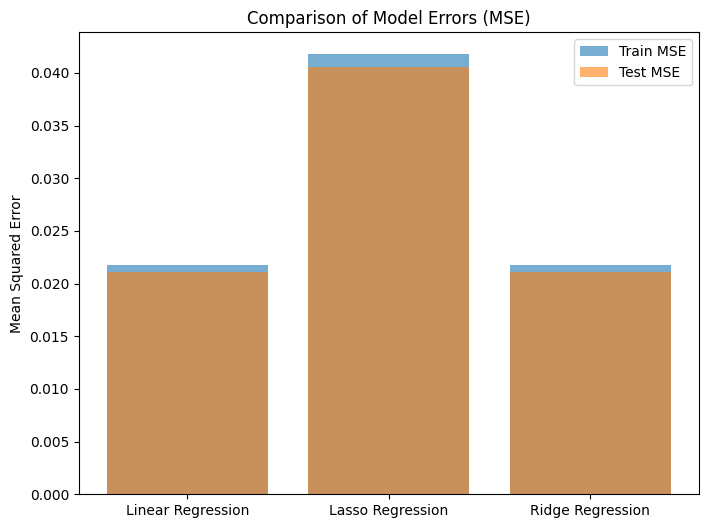


Best Model: Ridge Regression


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# تعریف مدل‌های مختلف
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=0.1)
}

# آموزش و ارزیابی مدل‌ها
results = {}
for model_name, model in models.items():
    # آموزش مدل
    model.fit(X_train, y_train)

    # پیش‌بینی
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # محاسبه MSE برای داده‌های آموزش و آزمون
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    results[model_name] = {
        'Train Error (MSE)': train_error,
        'Test Error (MSE)': test_error,
        'Model': model
    }

# نمایش نتایج MSE برای هر مدل
for model_name, result in results.items():
    print(f"{model_name} - Train MSE: {result['Train Error (MSE)']:.4f}, Test MSE: {result['Test Error (MSE)']:.4f}")

# مقایسه خطاهای مدل‌ها
labels = list(results.keys())
train_errors = [result['Train Error (MSE)'] for result in results.values()]
test_errors = [result['Test Error (MSE)'] for result in results.values()]

# نمودار مقایسه MSE
plt.figure(figsize=(8,6))
plt.bar(labels, train_errors, alpha=0.6, label='Train MSE')
plt.bar(labels, test_errors, alpha=0.6, label='Test MSE')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Model Errors (MSE)')
plt.legend()
plt.show()

# انتخاب بهترین مدل بر اساس کمترین MSE در آزمون
best_model_name = min(results, key=lambda model: results[model]['Test Error (MSE)'])
best_model = results[best_model_name]['Model']
print(f"\nBest Model: {best_model_name}")
